<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_1551-1600.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9518]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [9519]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

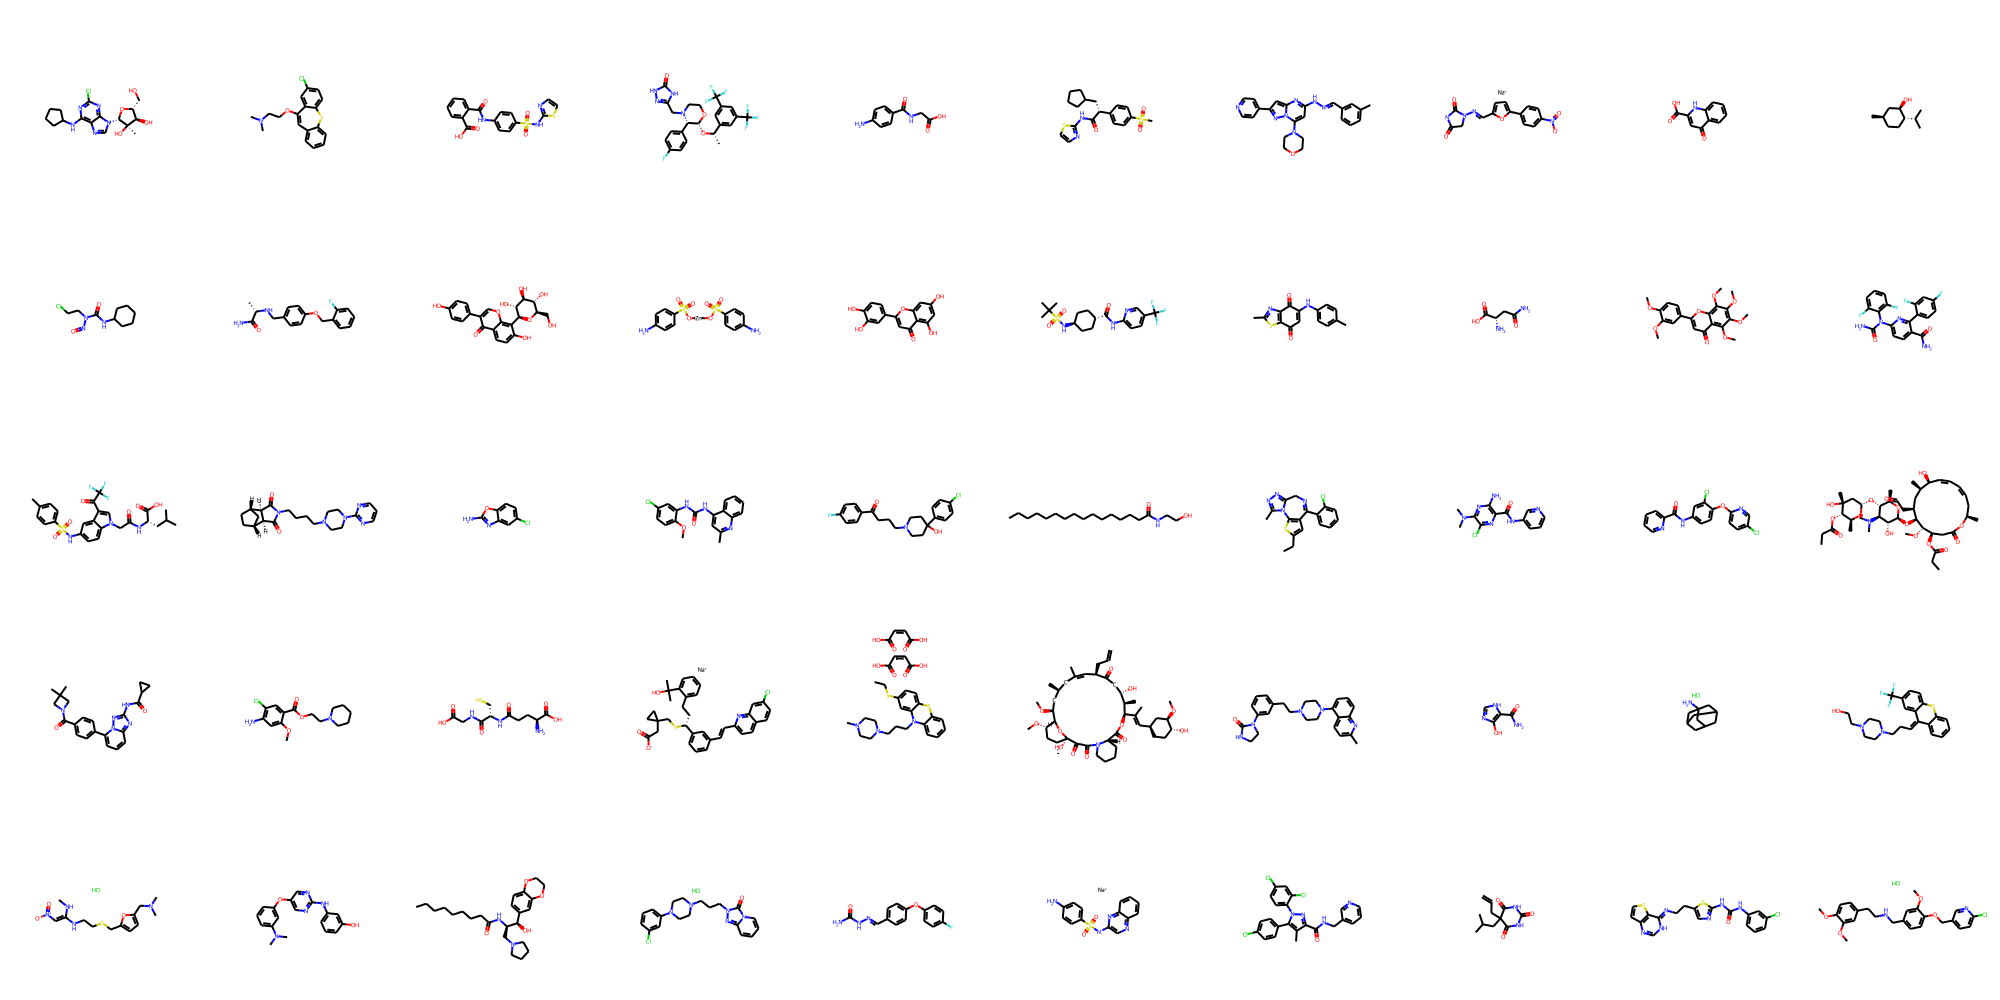

In [9520]:
smiles_list = [

'C[C@@]1(O)[C@H](O)[C@@H](CO)O[C@H]1n1cnc2c(NC3CCCC3)nc(Cl)nc21',
'CN(C)CCOC1=Cc2ccccc2Sc2ccc(Cl)cc21',
'O=C(O)c1ccccc1C(=O)Nc1ccc(S(=O)(=O)Nc2nccs2)cc1',
'C[C@H](O[C@H]1OCCN(Cc2n[nH]c(=O)[nH]2)[C@H]1c1ccc(F)cc1)c1cc(C(F)(F)F)cc(C(F)(F)F)c1',
'Nc1ccc(C(=O)NCC(=O)O)cc1',
'CS(=O)(=O)c1ccc([C@@H](CC2CCCC2)C(=O)Nc2nccs2)cc1',
'Cc1cccc(/C=N/Nc2cc(N3CCOCC3)n3nc(-c4ccncc4)cc3n2)c1',
'O=C1CN(/N=C/c2ccc(-c3ccc([N+](=O)[O-])cc3)o2)C(=O)[N-]1.[Na+]',
'O=C(O)c1cc(=O)c2ccccc2[nH]1',
'CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O',
'O=NN(CCCl)C(=O)NC1CCCCC1',
'C[C@H](NCc1ccc(OCc2ccccc2F)cc1)C(N)=O',
'O=c1c(-c2ccc(O)cc2)coc2c([C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)[C@H]3O)c(O)ccc12',
'Nc1ccc(S(=O)(=O)O[Zn]OS(=O)(=O)c2ccc(N)cc2)cc1',
'O=c1cc(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12',
'CC(C)(C)S(=O)(=O)N[C@H]1CC[C@H](C(=O)Nc2ccc(C(F)(F)F)cn2)CC1',
'Cc1ccc(NC2=CC(=O)c3sc(C)nc3C2=O)cc1',
'NC(=O)C[C@H](N)C(=O)O',
'COc1ccc(-c2cc(=O)c3c(OC)c(OC)c(OC)c(OC)c3o2)cc1OC',
'NC(=O)c1ccc(N(C(N)=O)c2c(F)cccc2F)nc1-c1ccc(F)cc1F',
'Cc1ccc(S(=O)(=O)Nc2ccc3c(c2)c(C(=O)C(F)(F)F)cn3CC(=O)N[C@@H](CC(C)C)C(=O)O)cc1',
'O=C1[C@H]2[C@@H]3CC[C@@H](C3)[C@H]2C(=O)N1CCCCN1CCN(c2ncccn2)CC1',
'Nc1nc2cc(Cl)ccc2o1',
'COc1ccc(Cl)cc1NC(=O)Nc1cc(C)nc2ccccc12',
'O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1',
'CCCCCCCCCCCCCCCC(=O)NCCO',
'CCc1cc2c(s1)-n1c(C)nnc1CN=C2c1ccccc1Cl',
'CN(C)c1nc(N)c(C(=O)Nc2cccnc2)nc1Cl',
'O=C(Nc1ccc(Oc2ccc(Cl)cn2)c(Cl)c1)c1ccccn1',
'CCC(=O)O[C@H]1[C@H](C)O[C@@H](O[C@@H]2[C@@H](C)O[C@@H](O[C@@H]3[C@@H](OC)[C@H](OC(=O)CC)CC(=O)O[C@H](C)C/C=C/C=C/[C@H](O)[C@H](C)C[C@@H]3CC=O)[C@H](O)[C@H]2N(C)C)C[C@@]1(C)O',
'CC1(C)CN(C(=O)c2ccc(-c3cccc4nc(NC(=O)C5CC5)nn34)cc2)C1',
'COc1cc(N)c(Cl)cc1C(=O)OCCN1CCCCC1',
'N[C@@H](CCC(=O)N[C@@H](CS)C(=O)NCC(=O)O)C(=O)O',
'CC(C)(O)c1ccccc1CC[C@@H](SCC1(CC(=O)[O-])CC1)c1cccc(/C=C/c2ccc3ccc(Cl)cc3n2)c1.[Na+]',
'CCSc1ccc2c(c1)N(CCCN1CCN(C)CC1)c1ccccc1S2.O=C(O)/C=C\C(=O)O.O=C(O)/C=C\C(=O)O',
'C=CC[C@@H]1/C=C(\C)C[C@H](C)C[C@H](OC)[C@H]2O[C@@](O)(C(=O)C(=O)N3CCCC[C@H]3C(=O)O[C@H](/C(C)=C/[C@@H]3CC[C@@H](O)[C@H](OC)C3)[C@H](C)[C@@H](O)CC1=O)[C@H](C)C[C@@H]2OC',
'Cc1ccc2c(N3CCN(CCc4cccc(N5CCNC5=O)c4)CC3)cccc2n1',
'NC(=O)c1[nH]cnc1O',
'Cl.NC12CC3CC(CC(C3)C1)C2',
'OCCN1CCN(CC/C=C2/c3ccccc3Sc3ccc(C(F)(F)F)cc32)CC1',
'CN/C(=C\[N+](=O)[O-])NCCSCc1ccc(CN(C)C)o1.Cl',
'CN(C)c1cccc(Oc2cnc(Nc3cccc(O)c3)nc2)c1',
'CCCCCCCCC(=O)N[C@H](CN1CCCC1)[C@H](O)c1ccc2c(c1)OCCO2',
'Cl.O=c1n(CCCN2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12',
'NC(=O)N/N=C/c1ccc(Oc2ccc(F)cc2)cc1',
'Nc1ccc(S(=O)(=O)[N-]c2cnc3ccccc3n2)cc1.[Na+]',
'Cc1c(C(=O)NCc2cccnc2)nn(-c2ccc(Cl)cc2Cl)c1-c1ccc(Cl)cc1',
'C=CCC1(CC(C)C)C(=O)NC(=O)NC1=O',
'O=C(Nc1cccc(Cl)c1)Nc1ncc(CCN=c2[nH]cnc3ccsc23)s1',
'COc1ccc(CCNCc2ccc(OCc3ccc(Cl)nc3)c(OC)c2)cc1OC.Cl',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



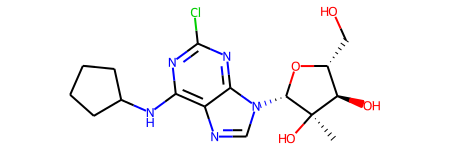

In [9521]:
M1 = mol_list [0]
M1

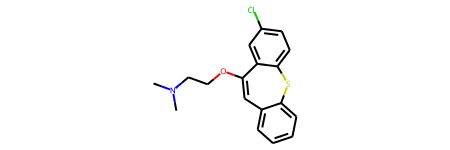

In [9522]:
M2 = mol_list [1]
M2

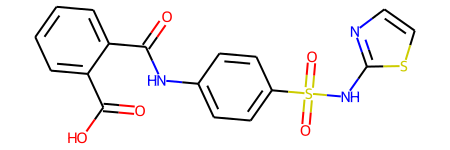

In [9523]:
M3 = mol_list [2]
M3

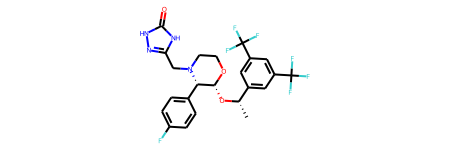

In [9524]:
M4 = mol_list [3]
M4

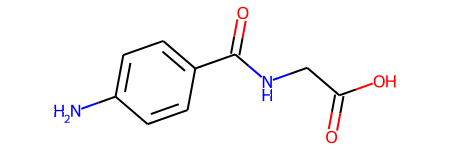

In [9525]:
M5 = mol_list [4]
M5

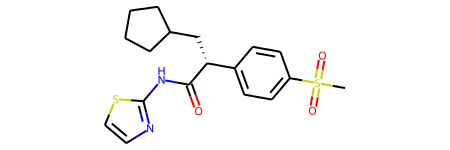

In [9526]:
M6 = mol_list [5]
M6

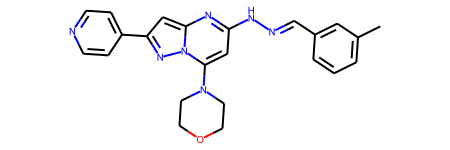

In [9527]:
M7 = mol_list [6]
M7

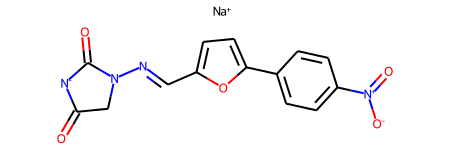

In [9528]:
M8 = mol_list [7]
M8

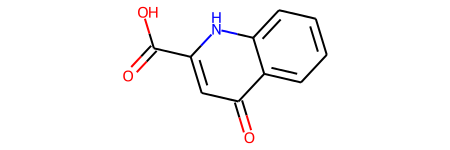

In [9529]:
M9 = mol_list [8]
M9

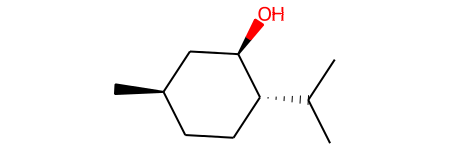

In [9530]:
M10 = mol_list [9]
M10

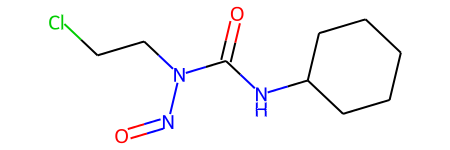

In [9531]:
M11 = mol_list [10]
M11

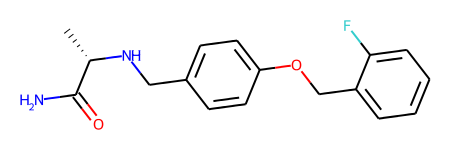

In [9532]:
M12 = mol_list [11]
M12

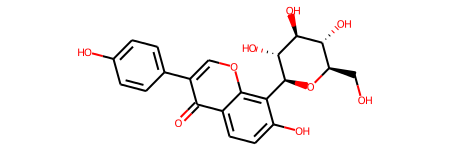

In [9533]:
M13 = mol_list [12]
M13

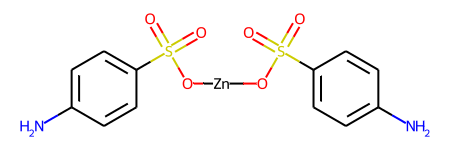

In [9534]:
M14 = mol_list [13]
M14

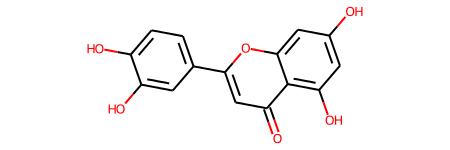

In [9535]:
M15 = mol_list [14]
M15

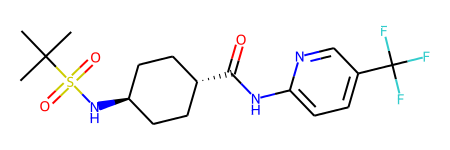

In [9536]:
M16 = mol_list [15]
M16

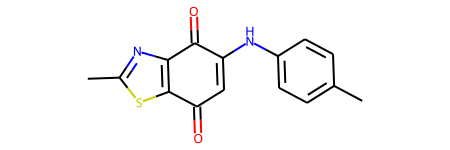

In [9537]:
M17 = mol_list [16]
M17

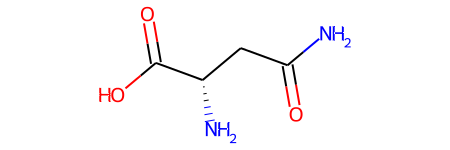

In [9538]:
M18 = mol_list [17]
M18

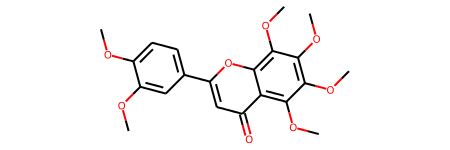

In [9539]:
M19 = mol_list [18]
M19

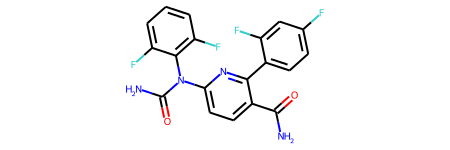

In [9540]:
M20 = mol_list [19]
M20

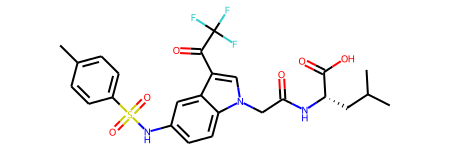

In [9541]:
M21 = mol_list [20]
M21

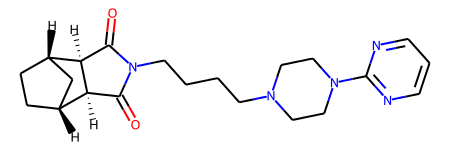

In [9542]:
M22 = mol_list [21]
M22

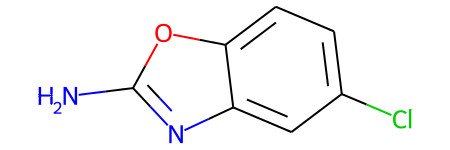

In [9543]:
M23 = mol_list [22]
M23

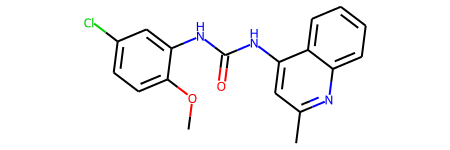

In [9544]:
M24 = mol_list [23]
M24

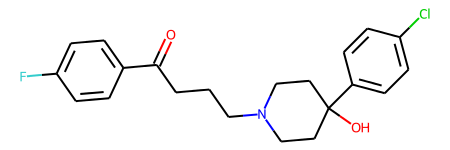

In [9545]:
M25 = mol_list [24]
M25

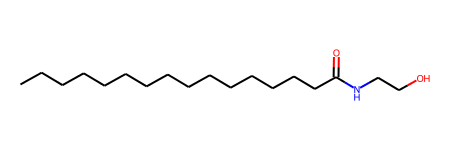

In [9546]:
M26 = mol_list [25]
M26

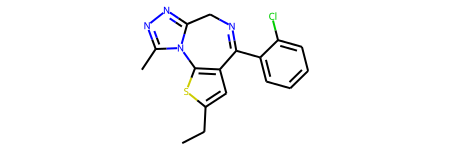

In [9547]:
M27 = mol_list [26]
M27

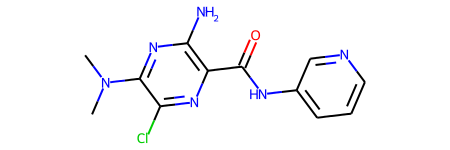

In [9548]:
M28 = mol_list [27]
M28

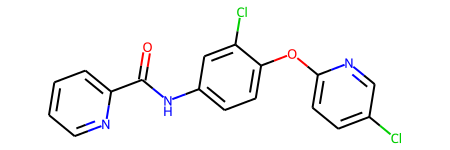

In [9549]:
M29 = mol_list [28]
M29

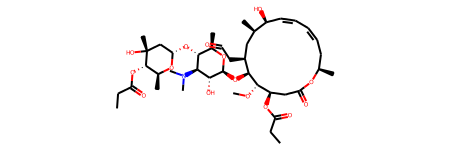

In [9550]:
M30 = mol_list [29]
M30

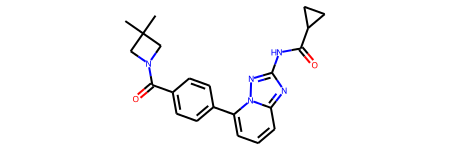

In [9551]:
M31 = mol_list [30]
M31

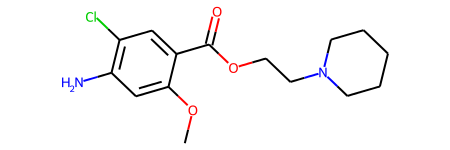

In [9552]:
M32 = mol_list [31]
M32

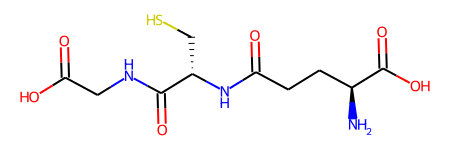

In [9553]:
M33 = mol_list [32]
M33

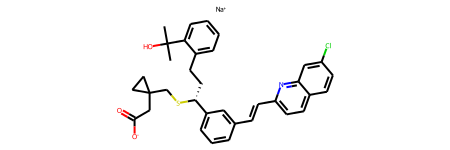

In [9554]:
M34 = mol_list [33]
M34

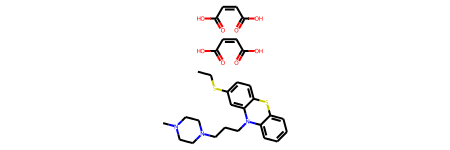

In [9555]:
M35 = mol_list [34]
M35

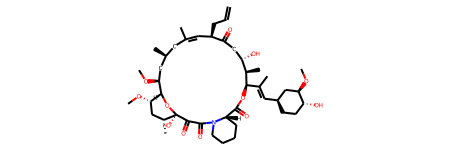

In [9556]:
M36 = mol_list [35]
M36

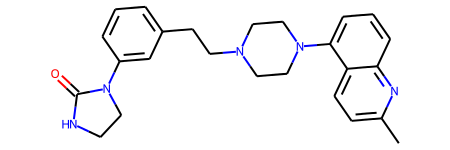

In [9557]:
M37= mol_list [36]
M37

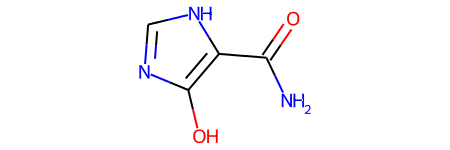

In [9558]:
M38= mol_list [37]
M38

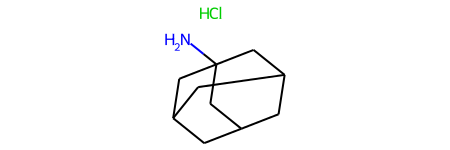

In [9559]:
M39= mol_list [38]
M39

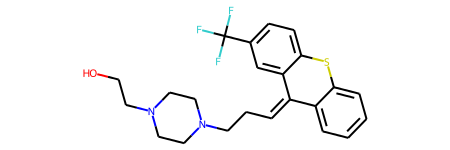

In [9560]:
M40= mol_list [39]
M40

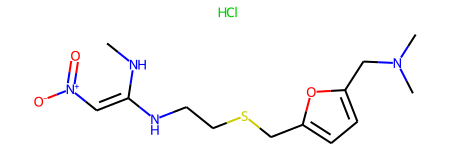

In [9561]:
M41= mol_list [40]
M41

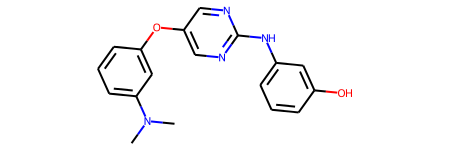

In [9562]:
M42= mol_list [41]
M42

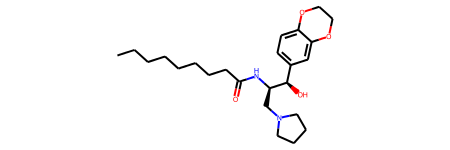

In [9563]:
M43= mol_list [42]
M43

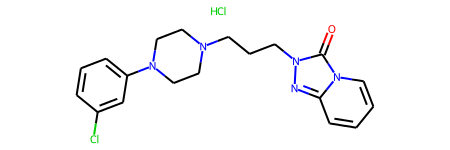

In [9564]:
M44= mol_list [43]
M44

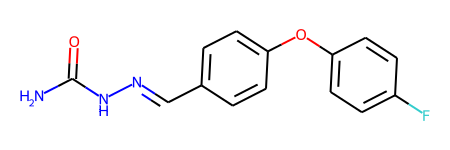

In [9565]:
M45= mol_list [44]
M45

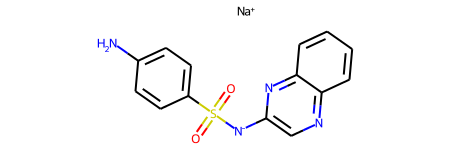

In [9566]:
M46= mol_list [45]
M46

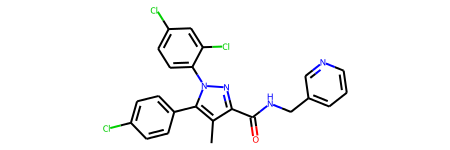

In [9567]:
M47= mol_list [46]
M47

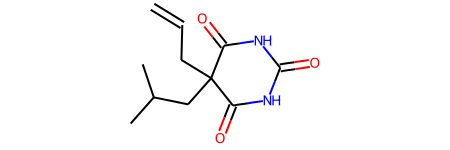

In [9568]:
M48= mol_list [47]
M48

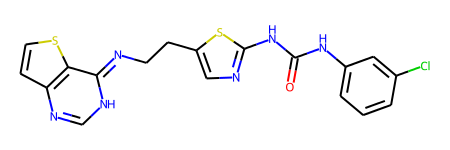

In [9569]:
M49= mol_list [48]
M49

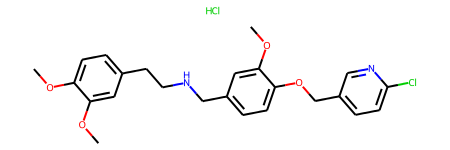

In [9570]:
M50= mol_list [49]
M50

In [9571]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[4,
 8,
 33,
 36,
 71,
 80,
 95,
 119,
 128,
 130,
 170,
 185,
 194,
 221,
 222,
 233,
 250,
 282,
 301,
 313,
 356,
 378,
 428,
 492,
 515,
 561,
 565,
 577,
 610,
 612,
 656,
 659,
 672,
 688,
 700,
 708,
 740,
 745,
 783,
 807,
 831,
 844,
 849,
 890,
 897,
 926,
 930,
 932,
 935,
 955,
 1019]

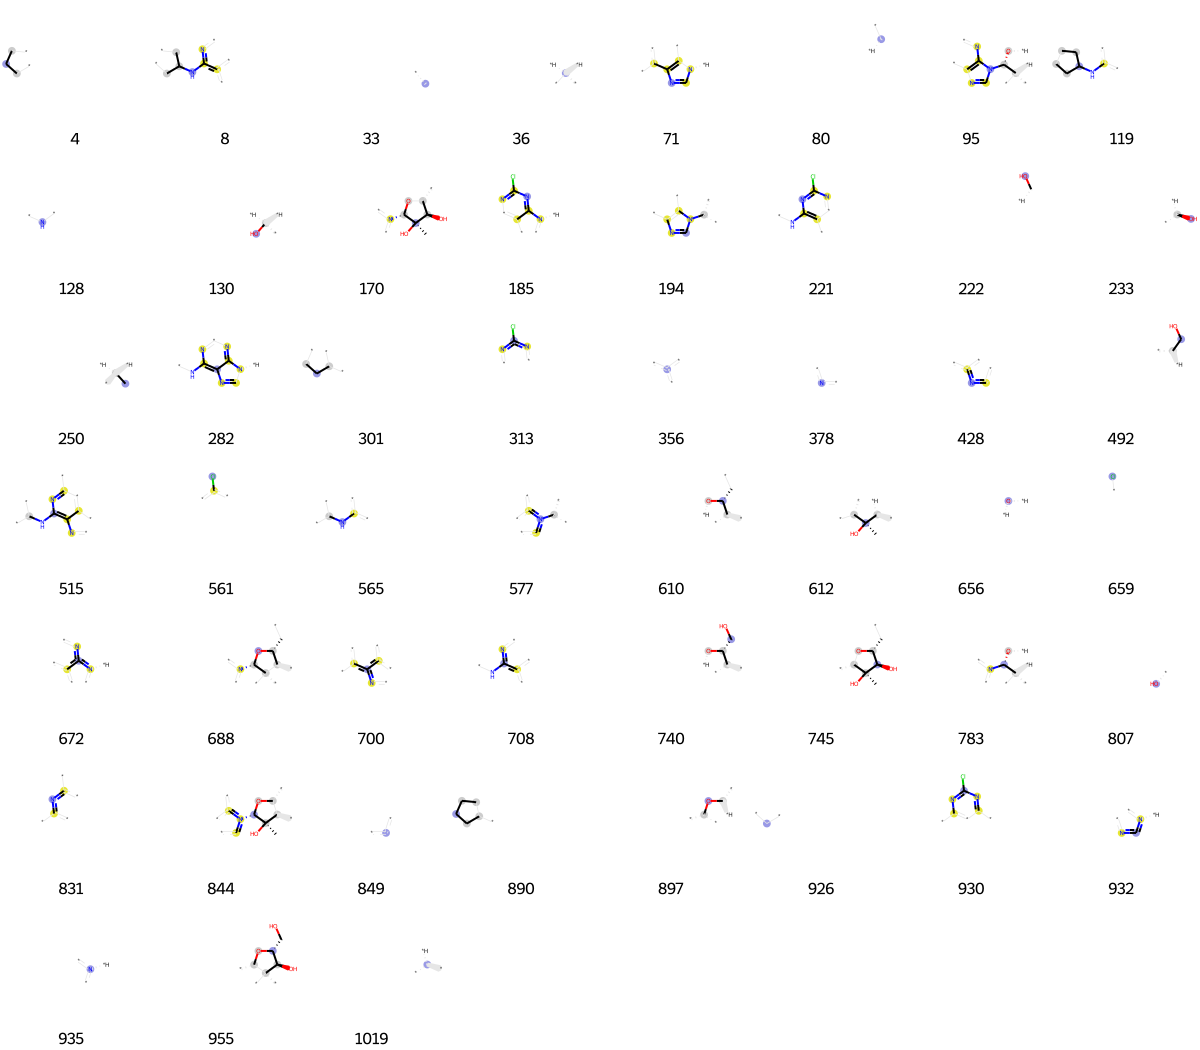

In [9572]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [9573]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[13,
 33,
 64,
 78,
 80,
 84,
 139,
 152,
 165,
 175,
 216,
 274,
 352,
 356,
 397,
 424,
 428,
 429,
 452,
 561,
 652,
 659,
 675,
 693,
 695,
 725,
 726,
 744,
 815,
 816,
 843,
 849,
 875,
 881,
 896,
 927,
 949,
 950,
 967,
 1020]

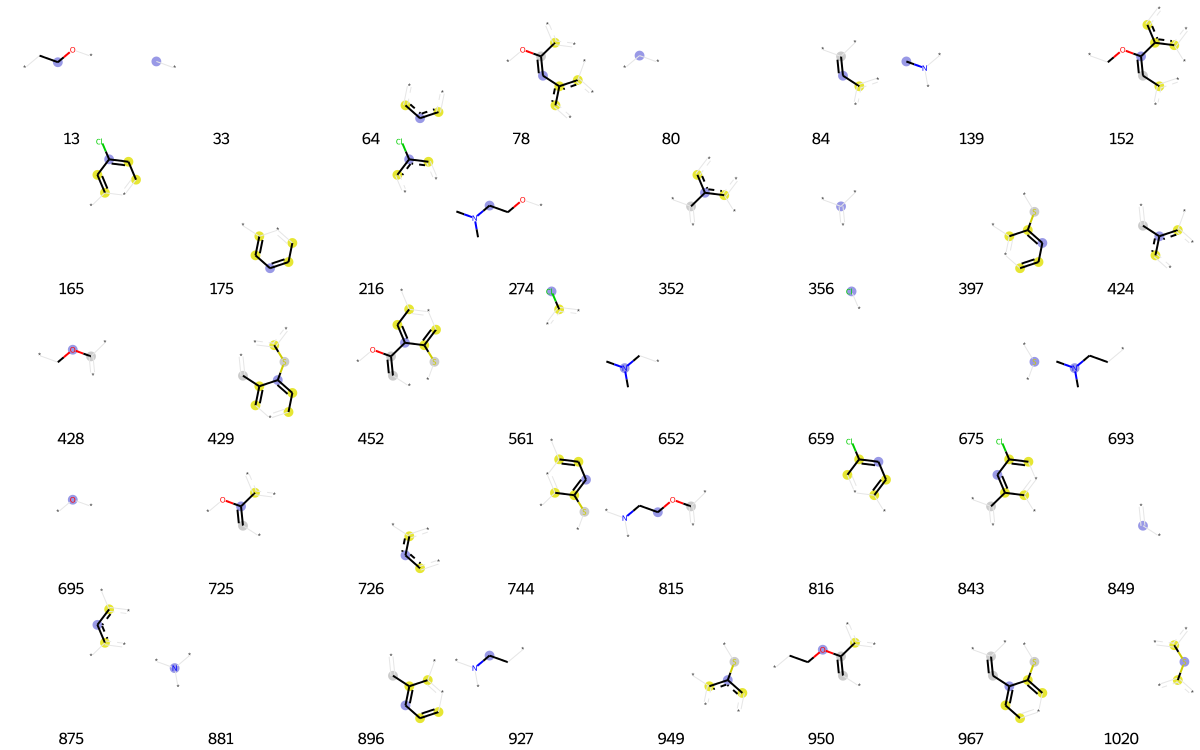

In [9574]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [9575]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[4,
 14,
 23,
 53,
 61,
 64,
 128,
 175,
 191,
 246,
 307,
 319,
 349,
 350,
 356,
 378,
 385,
 389,
 423,
 428,
 452,
 456,
 479,
 486,
 501,
 502,
 543,
 554,
 623,
 650,
 675,
 715,
 726,
 792,
 807,
 842,
 843,
 847,
 849,
 883,
 893,
 905,
 954,
 967]

In [9576]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[1,
 22,
 33,
 74,
 80,
 83,
 90,
 114,
 121,
 125,
 134,
 236,
 255,
 257,
 275,
 283,
 299,
 314,
 316,
 319,
 341,
 356,
 378,
 386,
 393,
 429,
 456,
 481,
 511,
 545,
 566,
 596,
 646,
 650,
 656,
 690,
 695,
 699,
 721,
 724,
 726,
 741,
 752,
 779,
 790,
 795,
 802,
 809,
 849,
 875,
 885,
 903,
 904,
 926,
 935,
 950,
 956,
 980,
 998,
 1019]

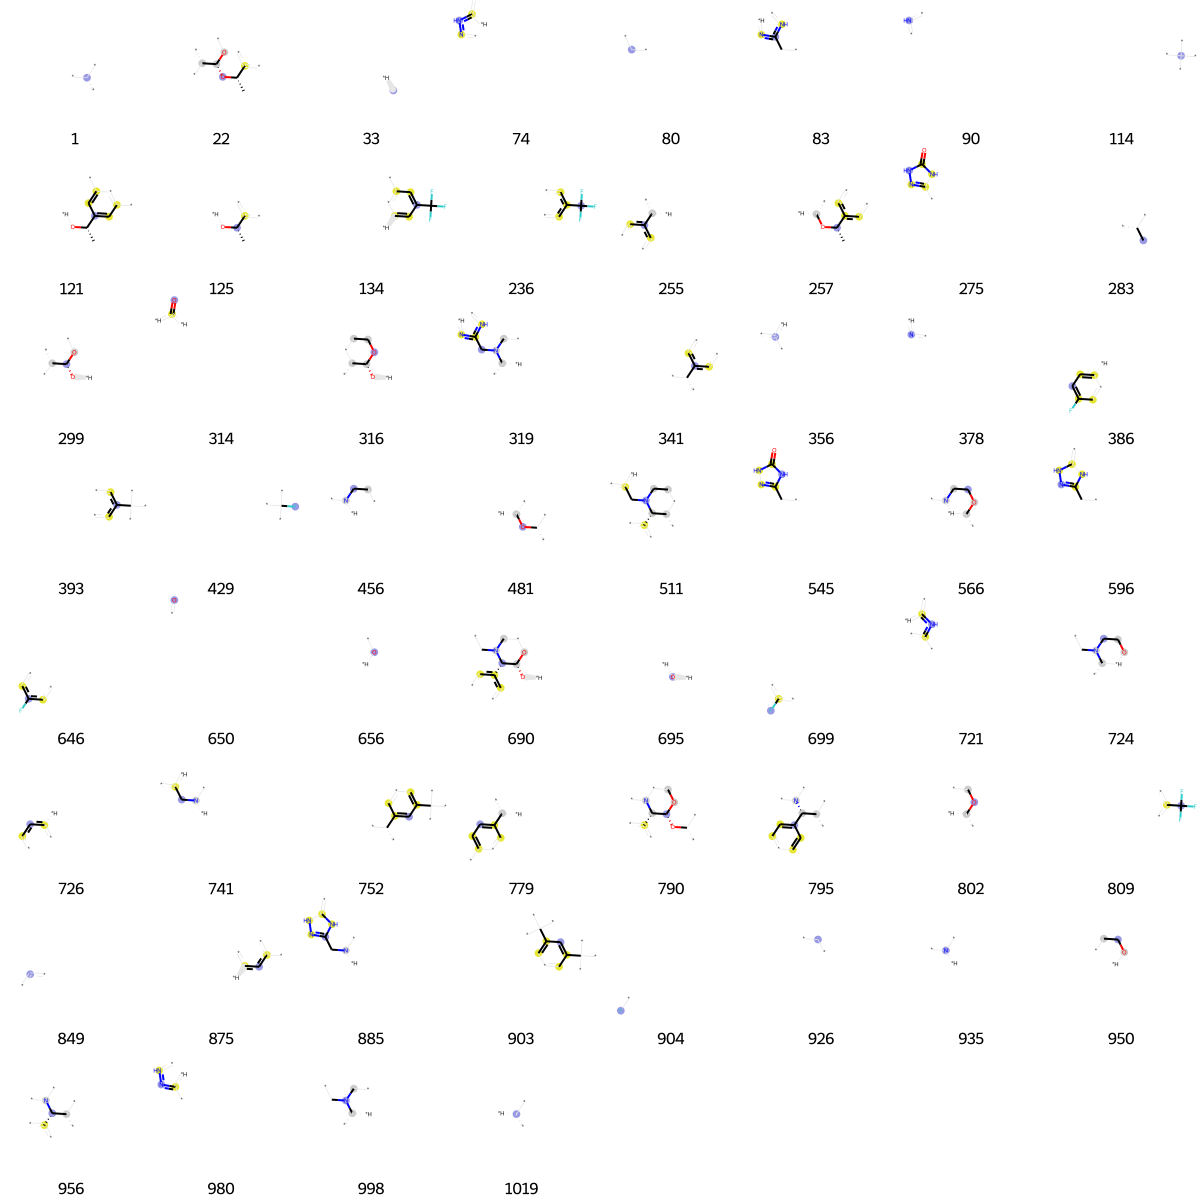

In [9577]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [9578]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[80,
 128,
 144,
 147,
 197,
 265,
 339,
 356,
 361,
 389,
 390,
 416,
 433,
 486,
 524,
 641,
 650,
 673,
 713,
 726,
 780,
 807,
 849,
 888,
 893]

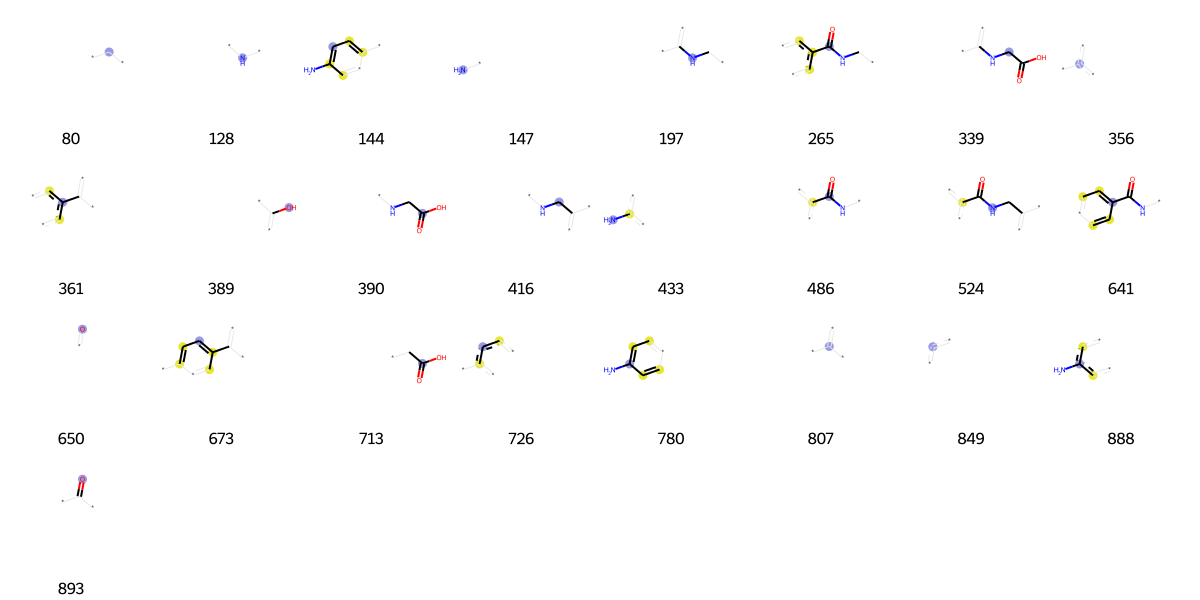

In [9579]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [9580]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[1,
 4,
 14,
 29,
 33,
 80,
 111,
 128,
 164,
 252,
 301,
 307,
 319,
 341,
 350,
 356,
 378,
 385,
 428,
 452,
 484,
 501,
 543,
 554,
 573,
 595,
 601,
 609,
 643,
 650,
 675,
 692,
 694,
 715,
 726,
 764,
 792,
 803,
 807,
 829,
 842,
 849,
 851,
 890,
 893,
 905,
 926,
 954,
 1019]

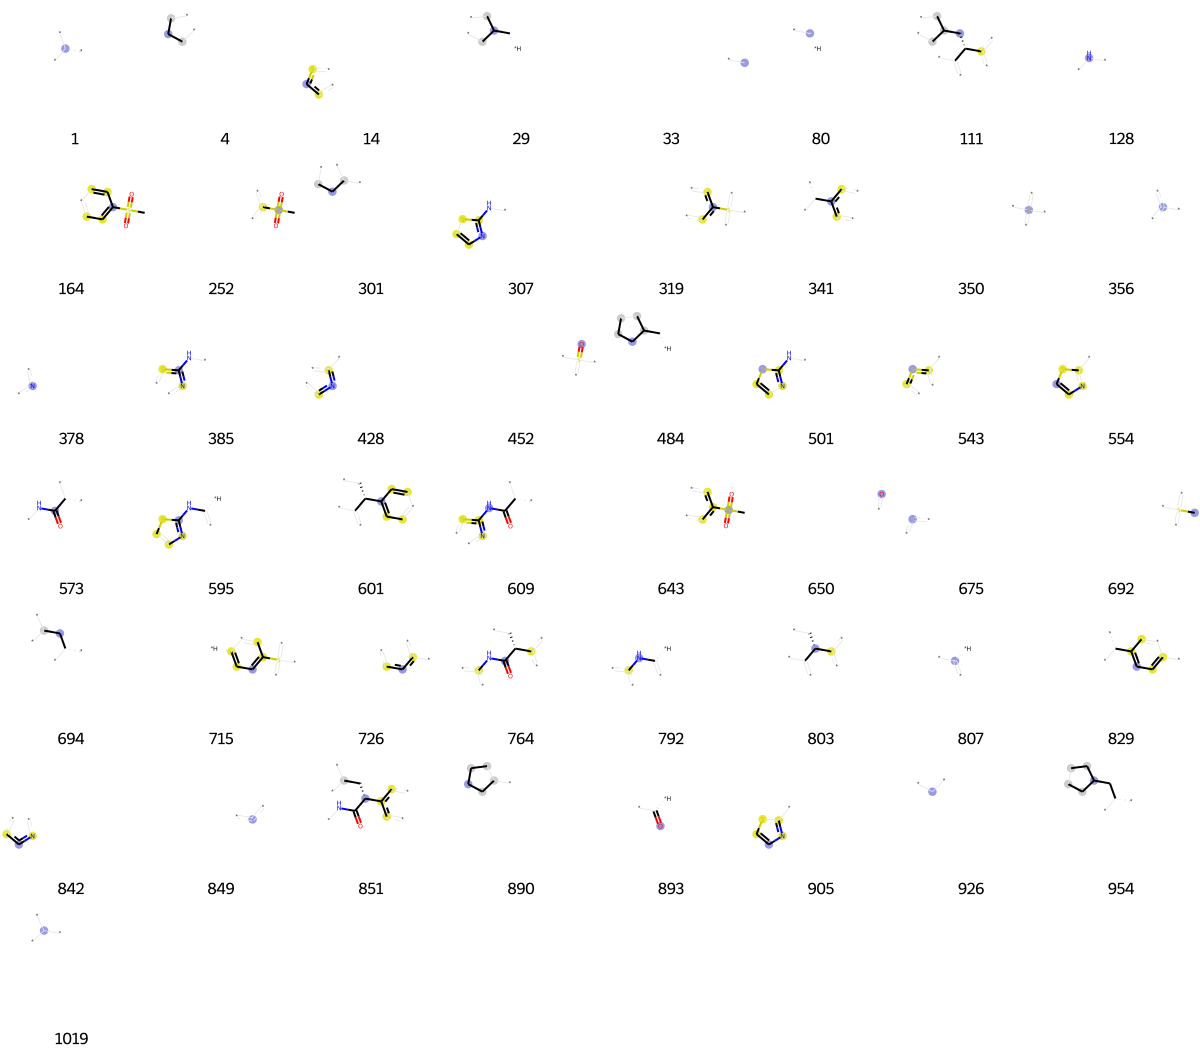

In [9581]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [9582]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[15,
 31,
 33,
 64,
 75,
 117,
 128,
 131,
 136,
 174,
 184,
 296,
 309,
 329,
 356,
 378,
 381,
 383,
 384,
 407,
 412,
 417,
 431,
 456,
 495,
 516,
 523,
 552,
 579,
 628,
 656,
 694,
 698,
 725,
 726,
 755,
 799,
 819,
 831,
 842,
 843,
 849,
 864,
 875,
 922,
 926,
 932,
 935,
 947,
 948,
 950,
 959,
 980,
 1009,
 1013,
 1014]

In [9583]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[28,
 35,
 98,
 121,
 134,
 136,
 171,
 189,
 235,
 245,
 250,
 270,
 273,
 303,
 314,
 328,
 352,
 356,
 364,
 580,
 583,
 650,
 656,
 672,
 694,
 710,
 715,
 725,
 726,
 753,
 769,
 770,
 785,
 790,
 838,
 849,
 859,
 864,
 865,
 895,
 896,
 913,
 922,
 926,
 935,
 939]

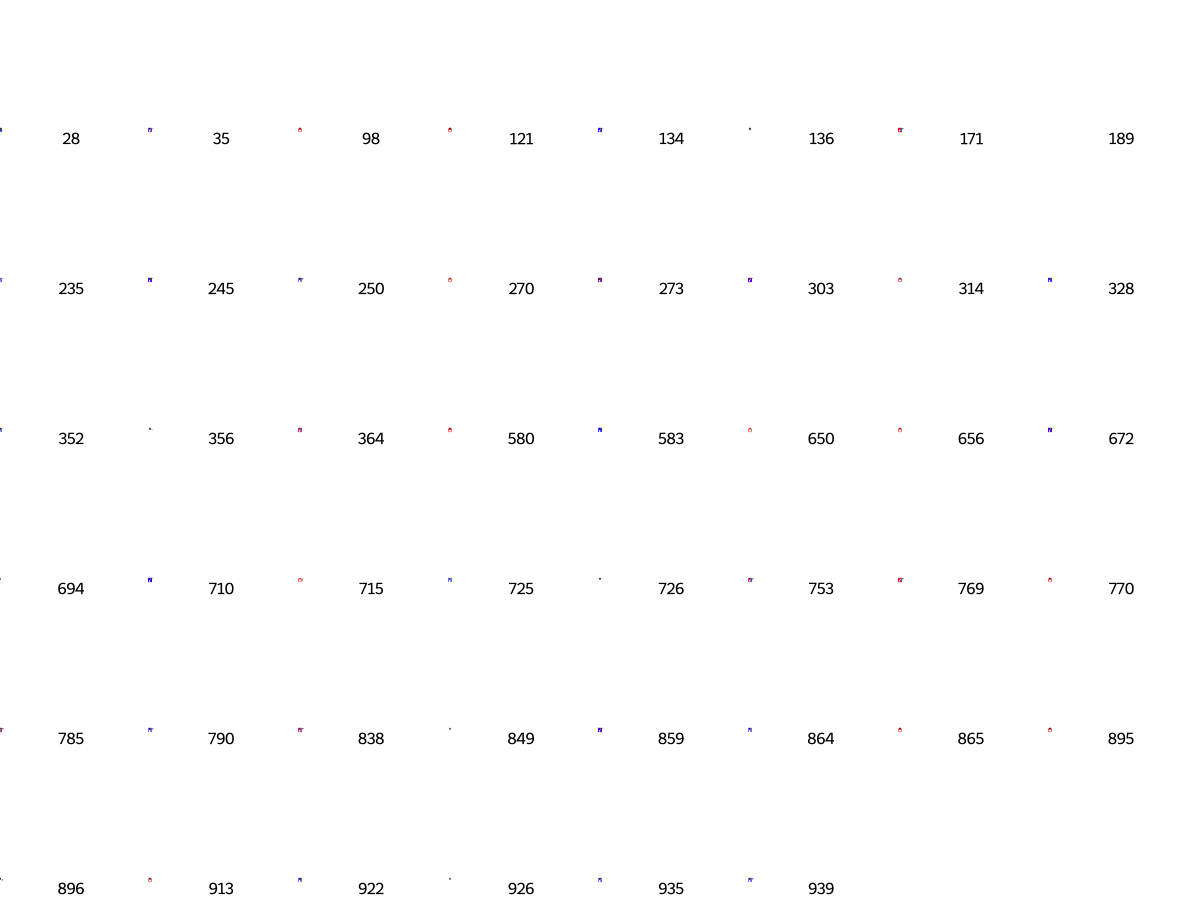

In [9584]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [9585]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[64,
 68,
 90,
 119,
 143,
 175,
 209,
 275,
 314,
 333,
 356,
 365,
 389,
 440,
 456,
 549,
 607,
 650,
 721,
 726,
 759,
 807,
 849,
 875,
 893,
 920,
 1018]

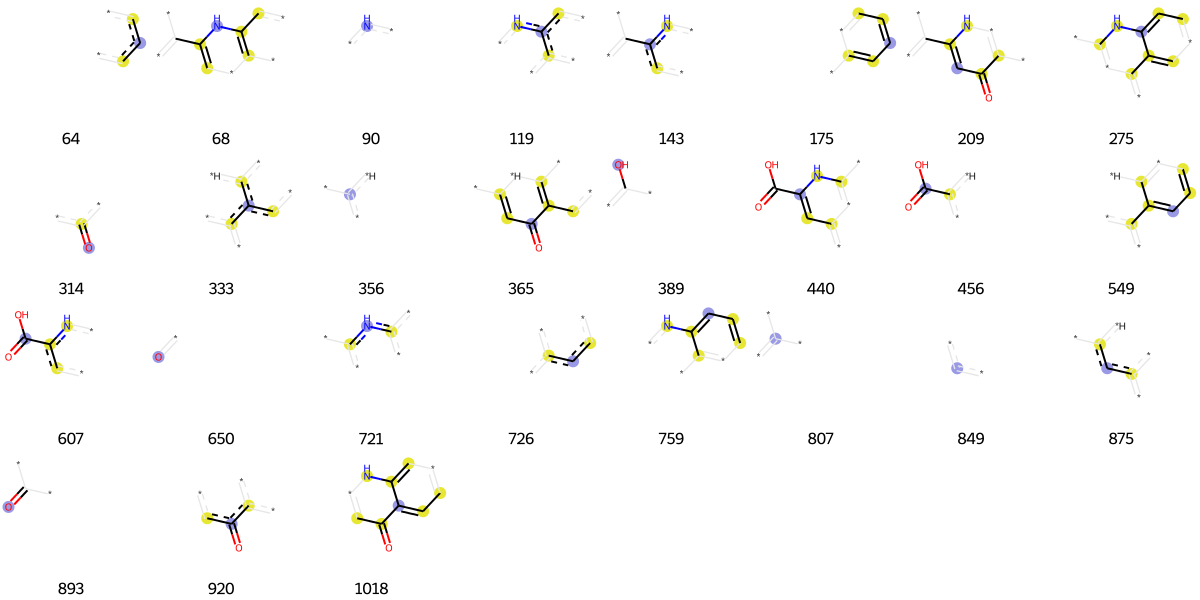

In [9586]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [9587]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[1,
 33,
 81,
 120,
 124,
 233,
 253,
 268,
 283,
 285,
 301,
 348,
 371,
 794,
 807,
 834,
 849,
 859,
 926,
 1004,
 1019]

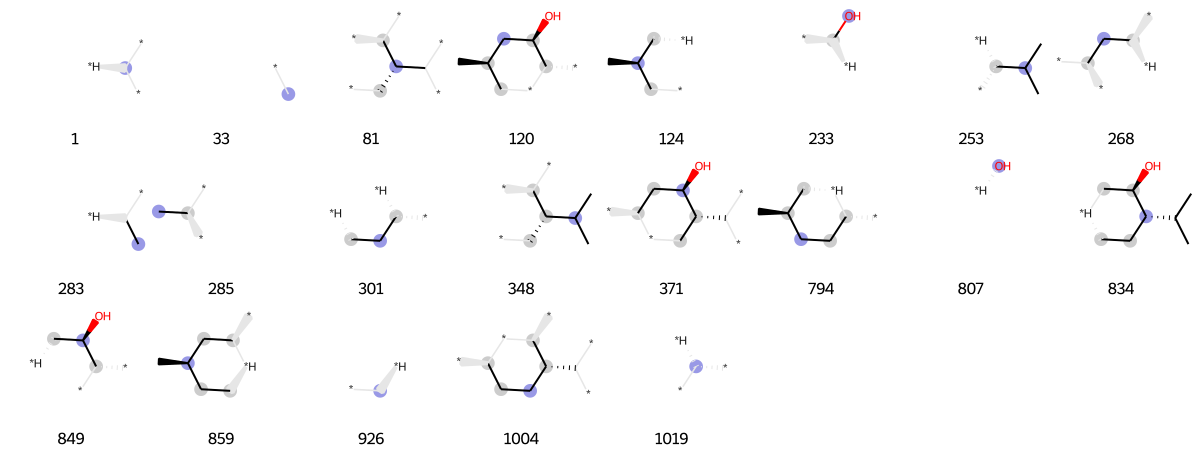

In [9588]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [9589]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[2,
 4,
 80,
 85,
 128,
 165,
 193,
 254,
 301,
 387,
 401,
 428,
 432,
 473,
 610,
 631,
 650,
 659,
 662,
 725,
 807,
 815,
 827,
 881,
 890,
 893,
 926,
 927,
 979,
 1019]

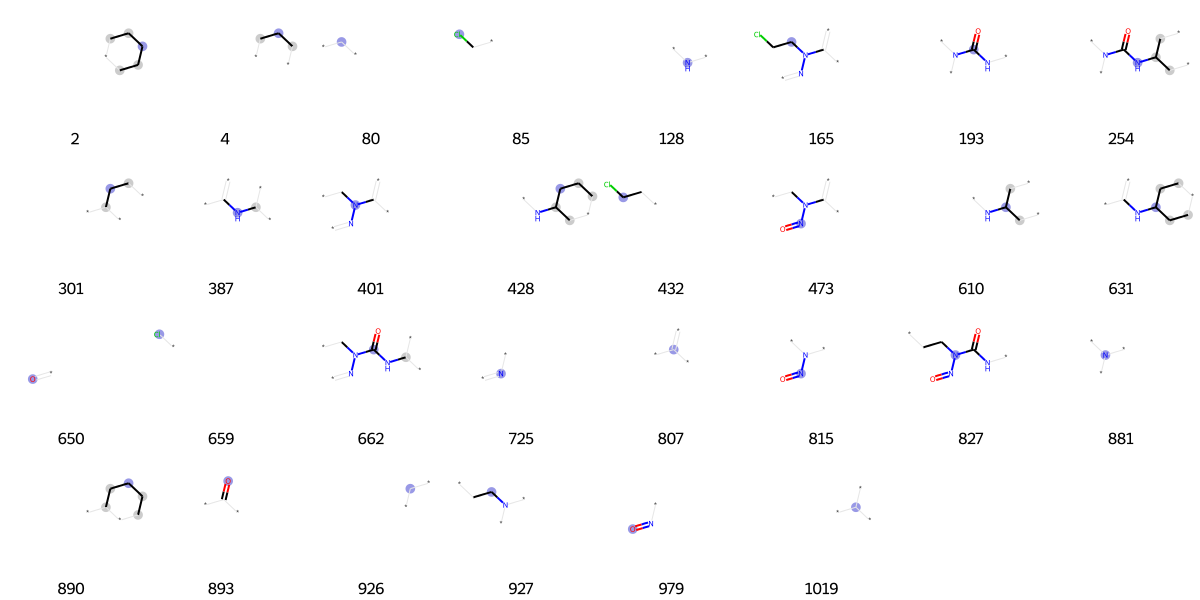

In [9590]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [9591]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 8,
 33,
 44,
 64,
 80,
 83,
 102,
 128,
 140,
 147,
 175,
 188,
 235,
 255,
 283,
 310,
 322,
 325,
 356,
 380,
 428,
 573,
 596,
 638,
 650,
 654,
 695,
 699,
 718,
 726,
 730,
 745,
 782,
 807,
 816,
 826,
 849,
 893,
 904,
 920,
 989]

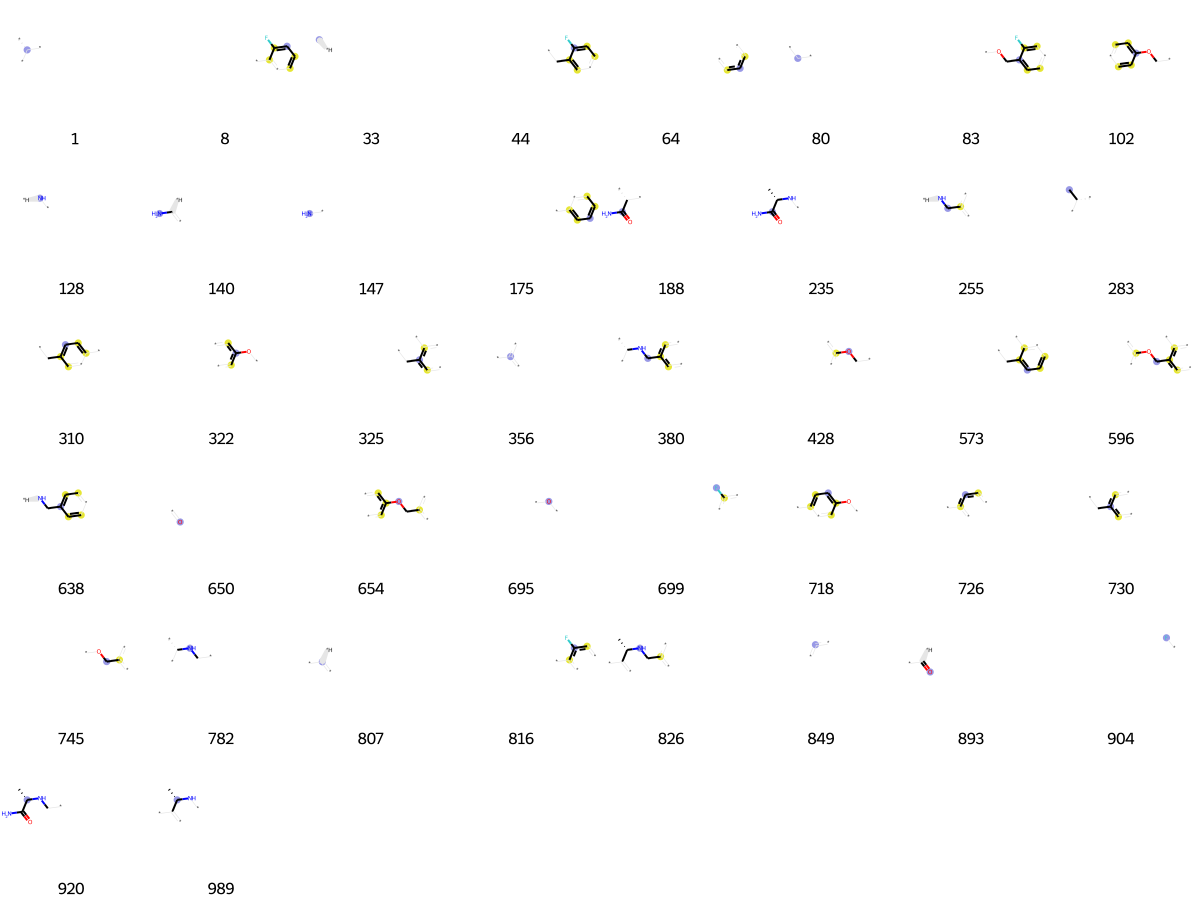

In [9592]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [9593]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[13,
 48,
 64,
 80,
 133,
 136,
 145,
 209,
 210,
 222,
 233,
 237,
 256,
 289,
 304,
 314,
 333,
 342,
 352,
 353,
 356,
 384,
 451,
 463,
 492,
 525,
 578,
 583,
 610,
 624,
 650,
 656,
 670,
 690,
 709,
 726,
 740,
 745,
 754,
 807,
 820,
 827,
 849,
 896,
 897,
 996,
 1019]

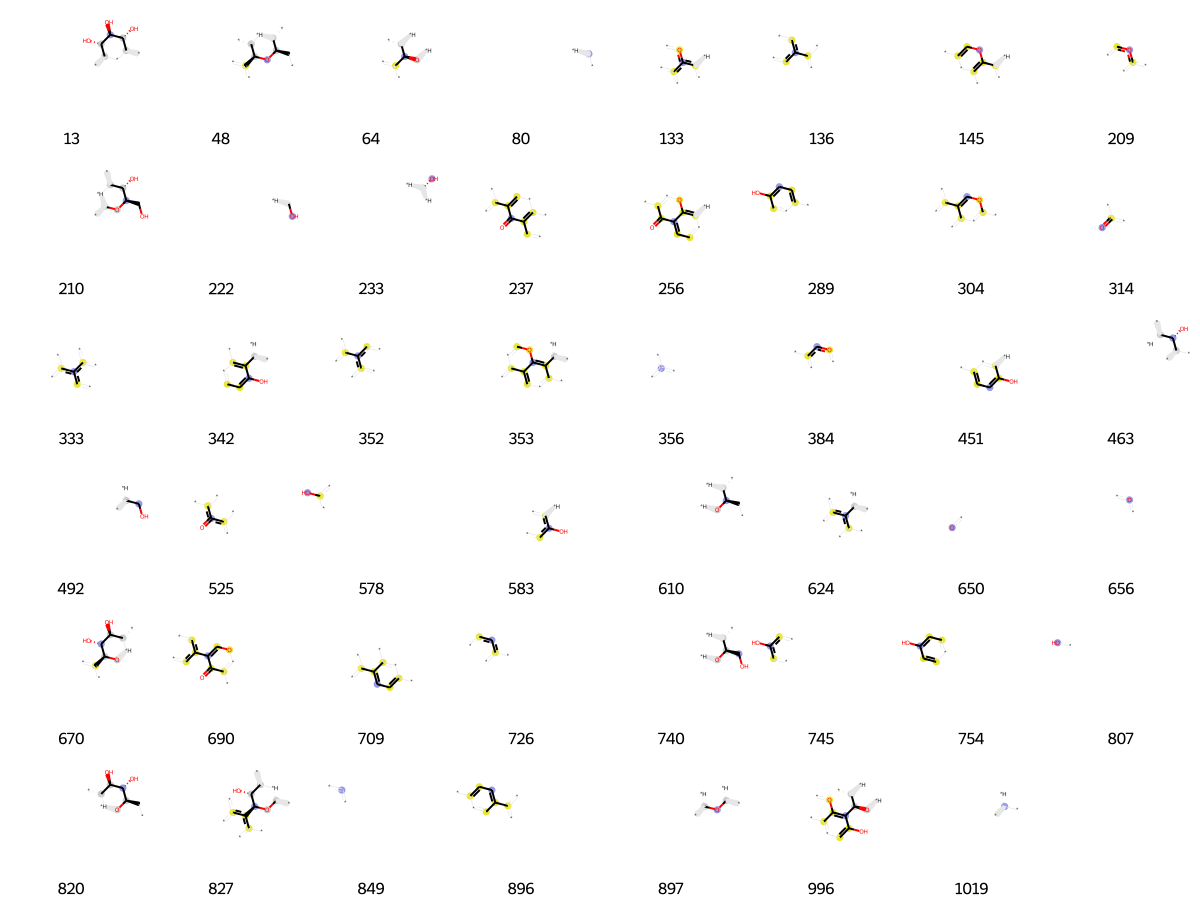

In [9594]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [9595]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[144,
 147,
 186,
 187,
 210,
 217,
 319,
 350,
 356,
 419,
 433,
 452,
 491,
 650,
 695,
 715,
 726,
 762,
 780,
 797,
 849,
 888]

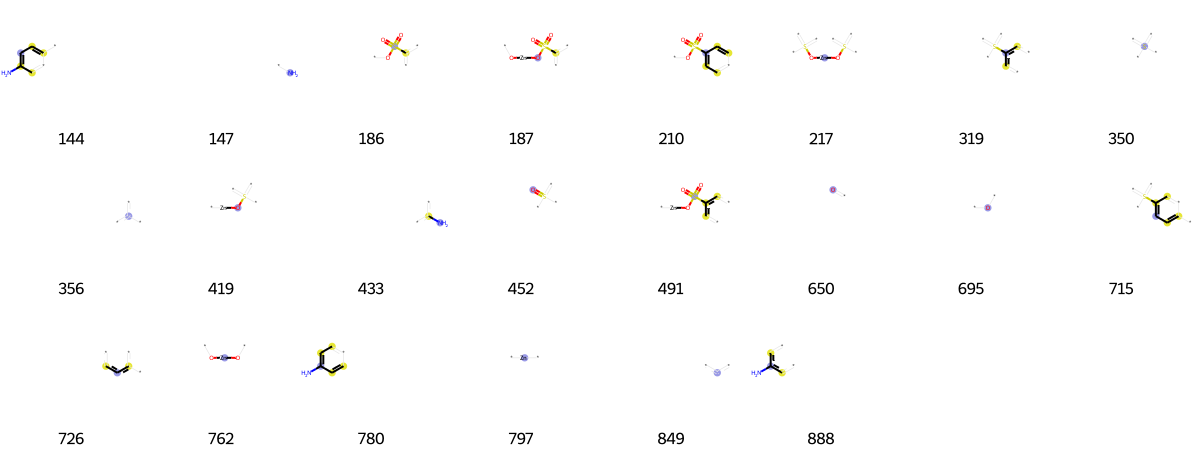

In [9596]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [9597]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[54,
 121,
 136,
 157,
 167,
 250,
 314,
 315,
 356,
 451,
 472,
 501,
 578,
 580,
 583,
 589,
 630,
 650,
 656,
 666,
 726,
 732,
 745,
 779,
 784,
 807,
 849,
 875,
 896,
 920,
 960,
 964,
 992]

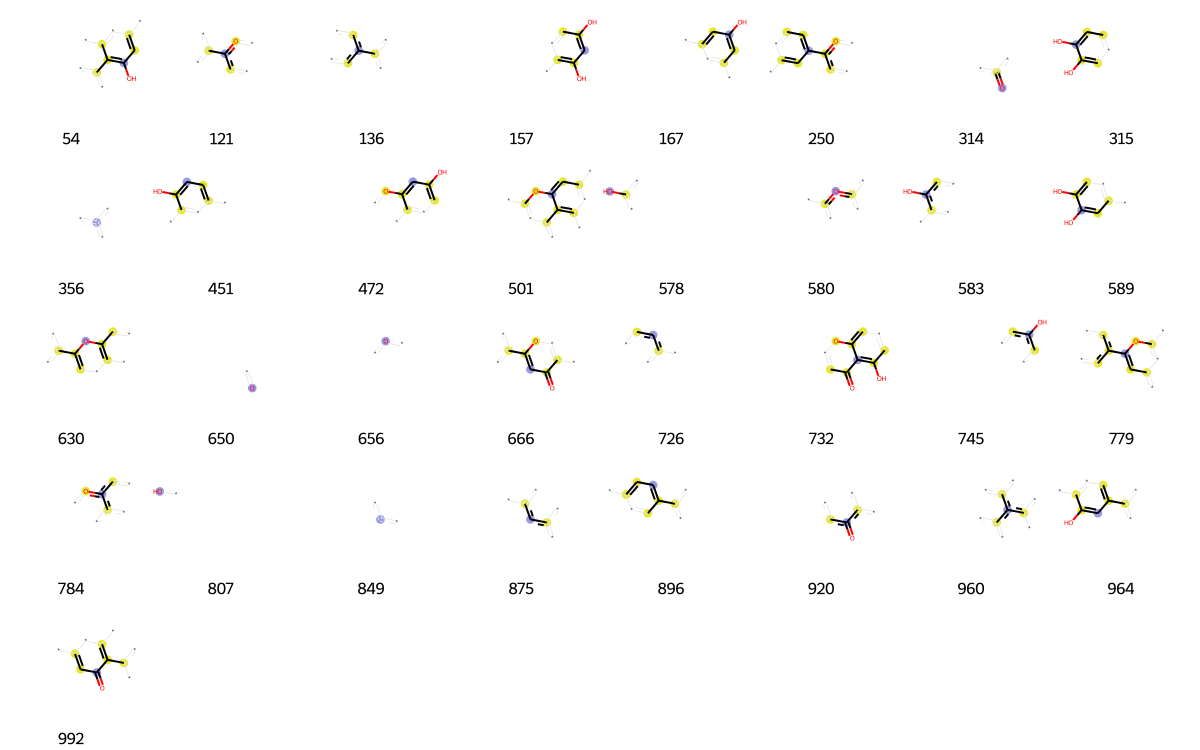

In [9598]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [9599]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[9,
 22,
 33,
 36,
 54,
 75,
 114,
 128,
 171,
 197,
 236,
 251,
 288,
 301,
 350,
 356,
 378,
 392,
 393,
 407,
 428,
 429,
 452,
 511,
 606,
 610,
 641,
 650,
 689,
 712,
 726,
 785,
 792,
 807,
 809,
 849,
 893,
 898,
 904,
 911,
 926,
 933,
 967,
 974,
 1019]

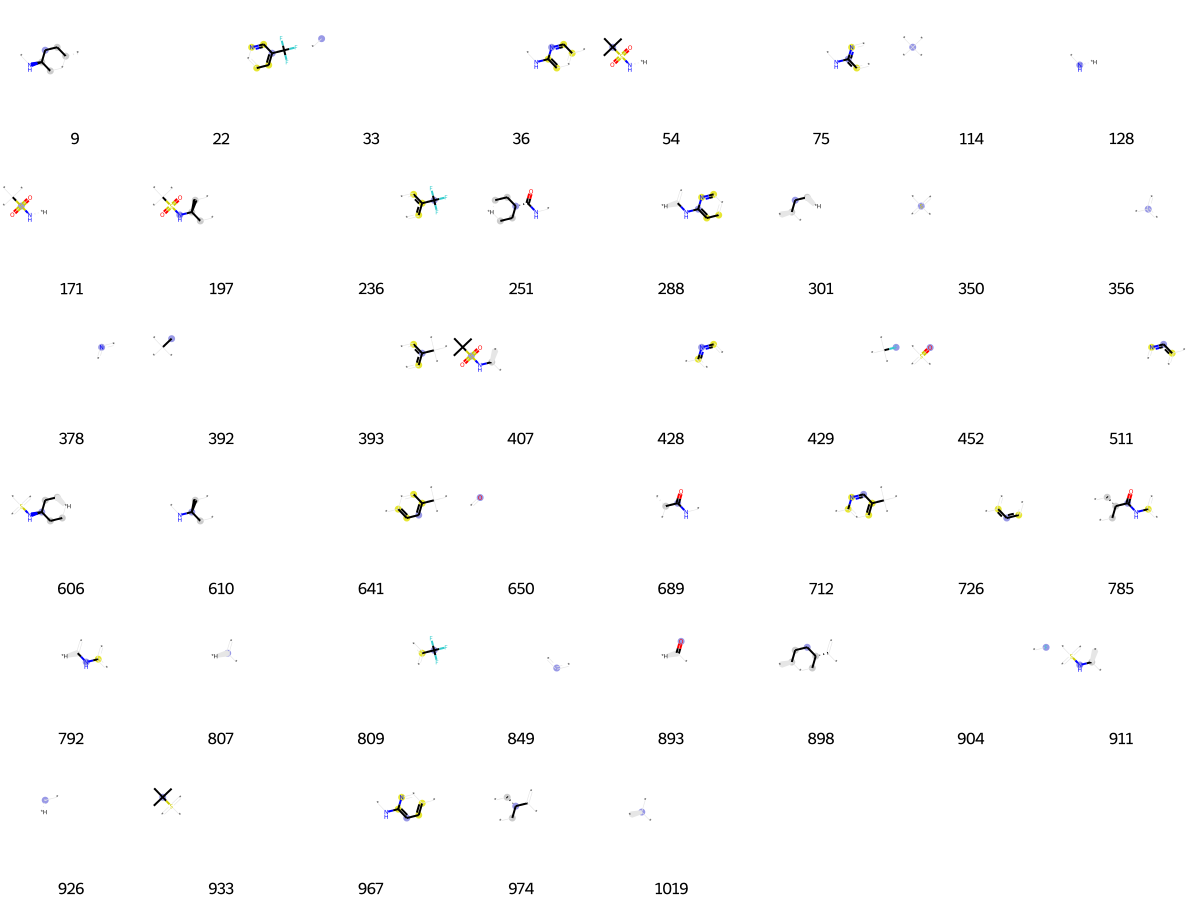

In [9600]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [9601]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[2,
 33,
 84,
 90,
 128,
 139,
 162,
 176,
 191,
 235,
 299,
 302,
 314,
 323,
 356,
 378,
 452,
 491,
 500,
 650,
 665,
 675,
 698,
 726,
 747,
 762,
 795,
 799,
 812,
 818,
 831,
 836,
 843,
 849,
 896]

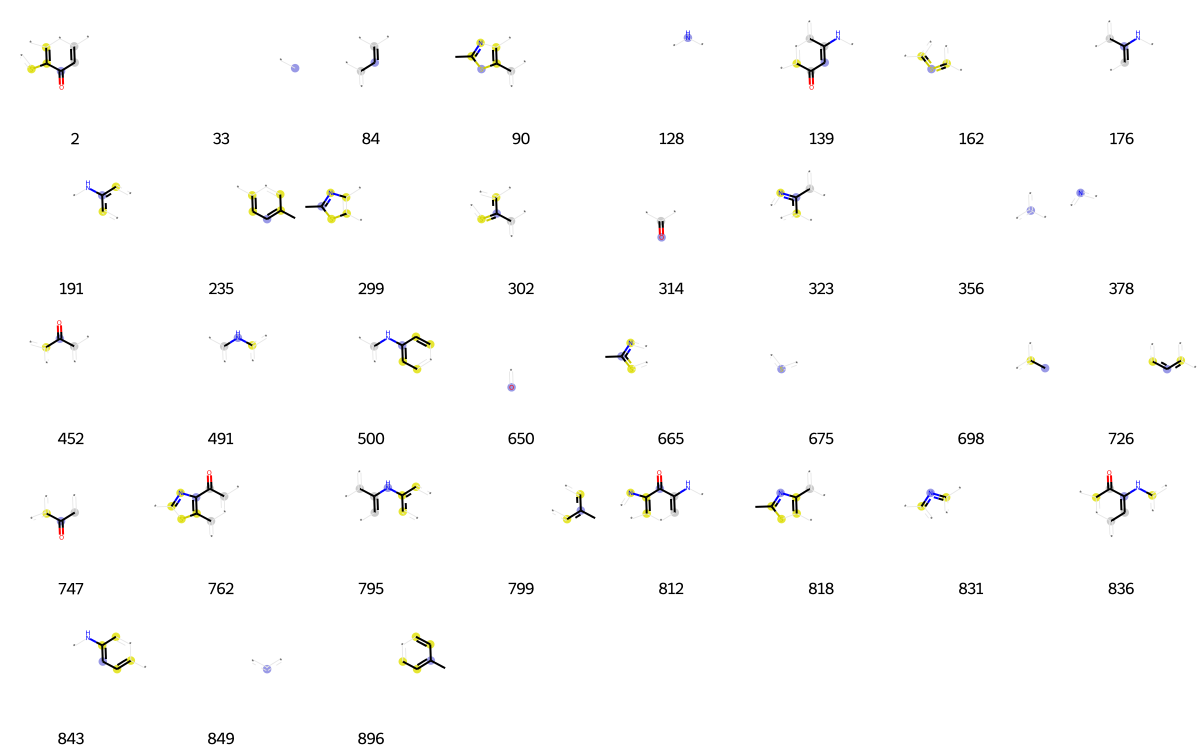

In [9602]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [9603]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[1,
 80,
 140,
 147,
 266,
 376,
 389,
 403,
 650,
 776,
 786,
 807,
 820,
 825,
 874,
 893,
 922]

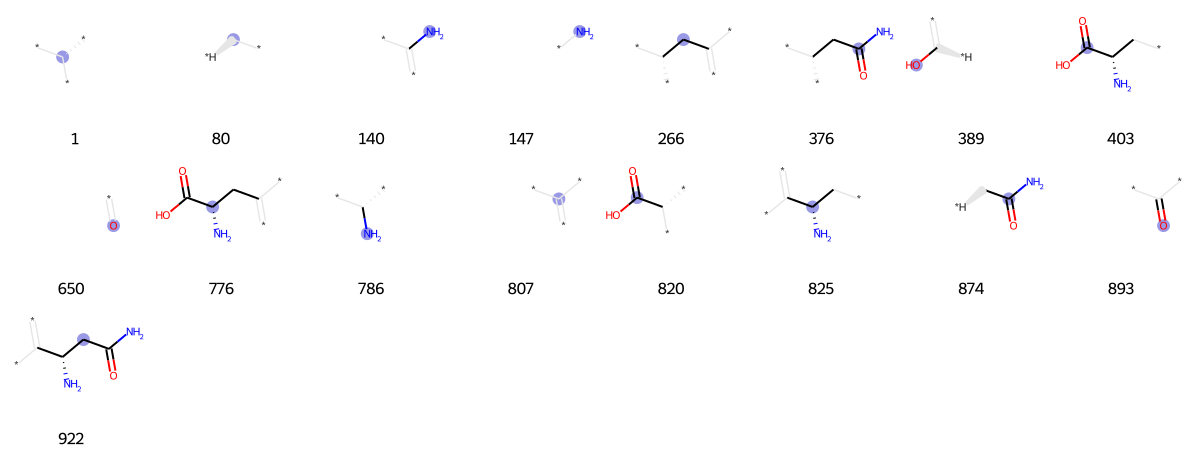

In [9604]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [9605]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[33,
 94,
 121,
 133,
 136,
 140,
 175,
 221,
 249,
 250,
 280,
 314,
 333,
 356,
 415,
 476,
 502,
 512,
 575,
 580,
 650,
 656,
 666,
 695,
 726,
 779,
 796,
 841,
 845,
 849,
 875,
 896,
 920,
 946,
 960,
 992]

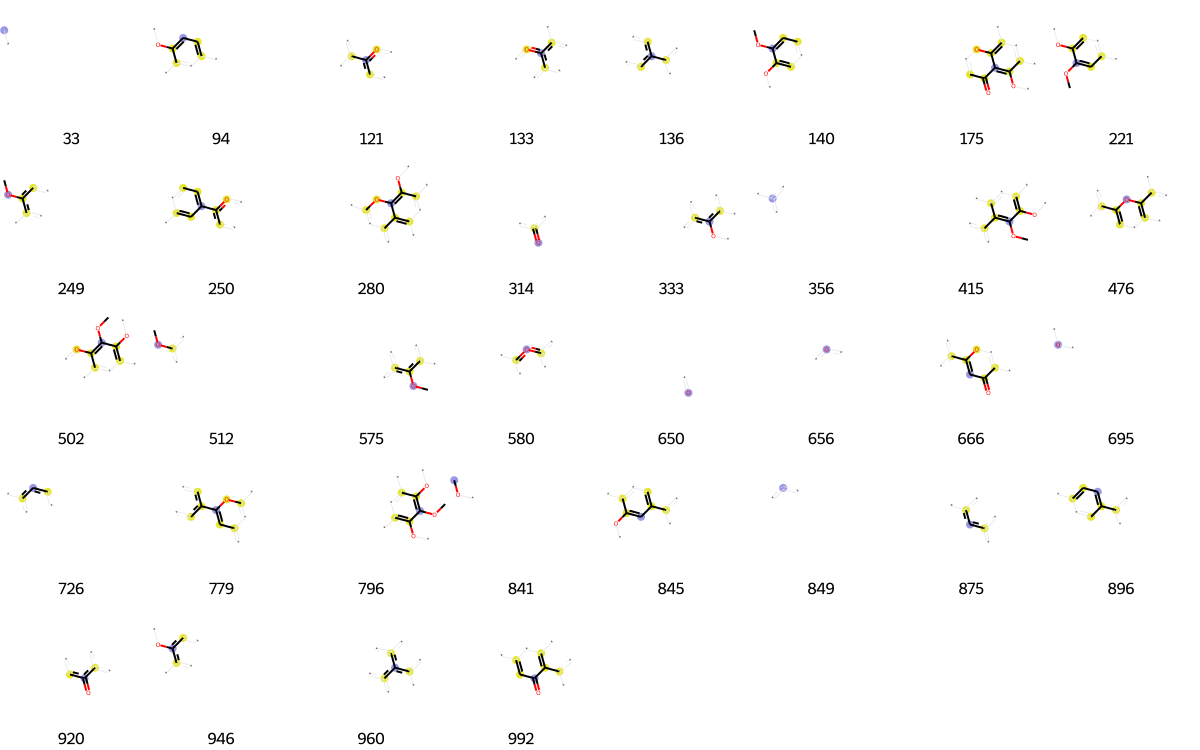

In [9606]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [9607]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[8,
 15,
 64,
 67,
 83,
 110,
 138,
 140,
 147,
 258,
 309,
 323,
 352,
 356,
 368,
 374,
 378,
 386,
 407,
 463,
 534,
 646,
 650,
 680,
 690,
 699,
 706,
 726,
 746,
 754,
 780,
 807,
 816,
 831,
 849,
 854,
 875,
 881,
 893,
 894,
 904,
 925,
 965,
 967]

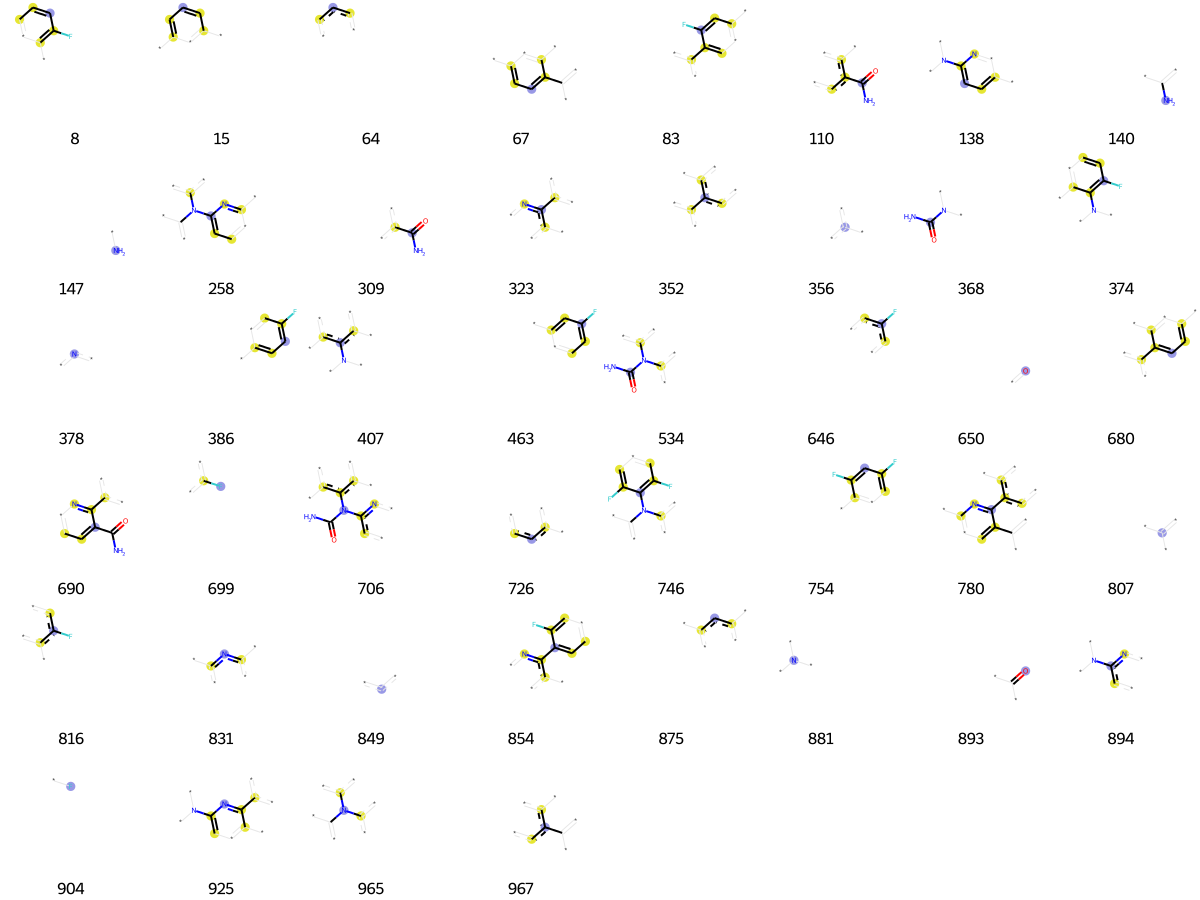

In [9608]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [9609]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[1,
 4,
 15,
 33,
 41,
 45,
 61,
 80,
 114,
 117,
 128,
 144,
 191,
 235,
 246,
 283,
 284,
 288,
 319,
 333,
 350,
 356,
 389,
 400,
 429,
 431,
 452,
 458,
 464,
 479,
 486,
 490,
 502,
 548,
 600,
 650,
 680,
 698,
 715,
 717,
 726,
 732,
 736,
 743,
 744,
 759,
 799,
 807,
 820,
 823,
 843,
 849,
 875,
 883,
 893,
 896,
 904,
 922,
 935,
 967,
 977,
 997]

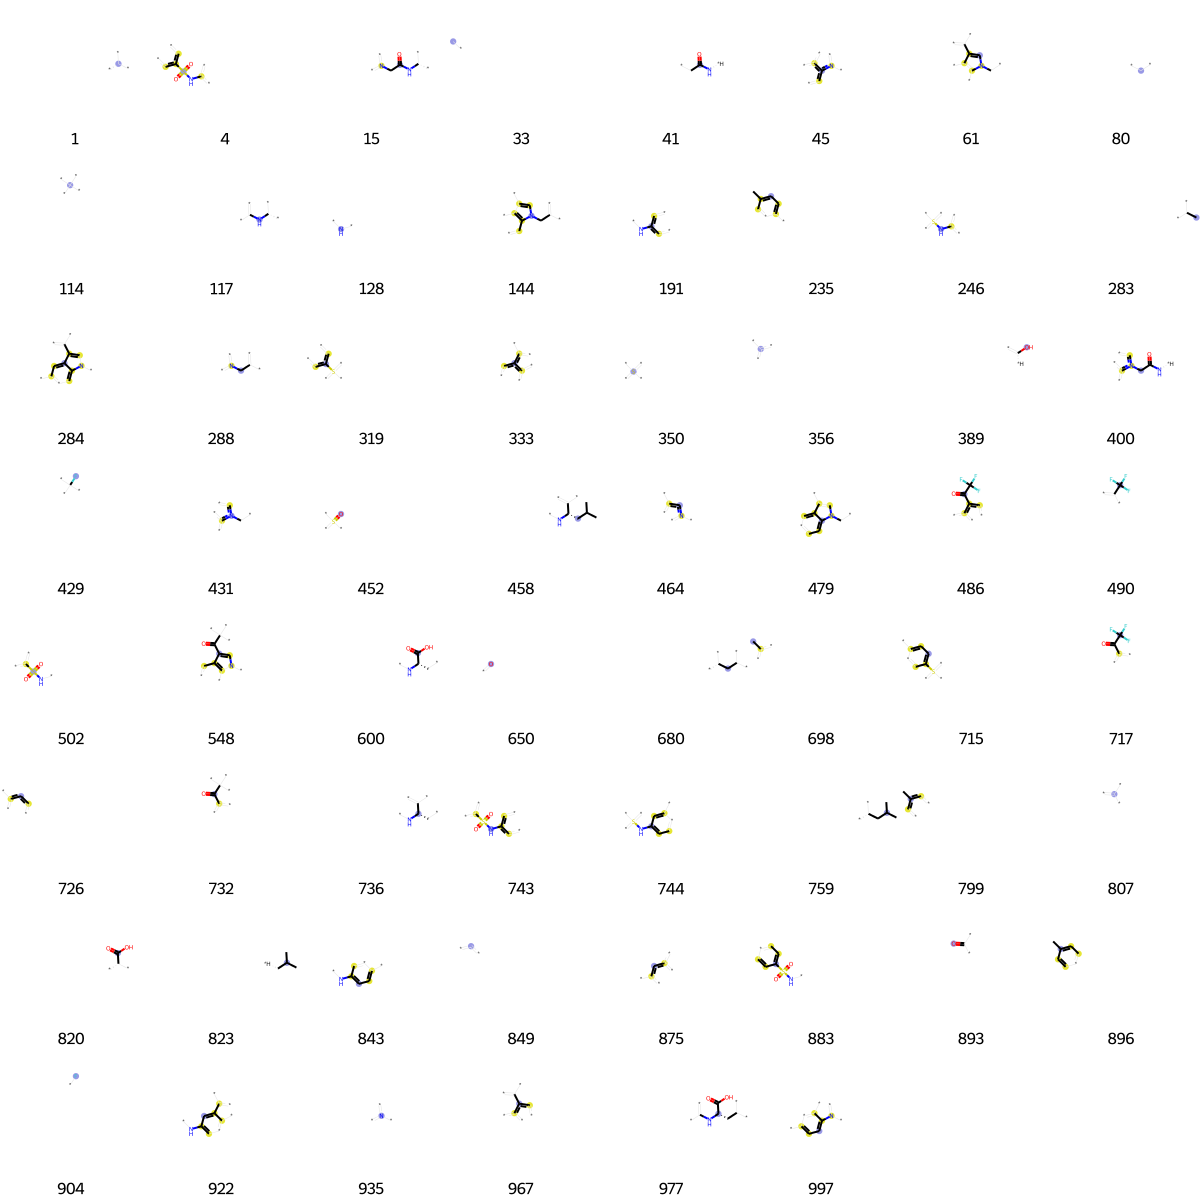

In [9610]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [9611]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[5,
 64,
 74,
 80,
 121,
 131,
 192,
 232,
 268,
 301,
 314,
 356,
 378,
 407,
 428,
 433,
 446,
 448,
 456,
 458,
 460,
 484,
 585,
 588,
 644,
 650,
 653,
 755,
 767,
 825,
 842,
 849,
 887,
 893,
 923,
 926,
 935,
 983,
 1019,
 1023]

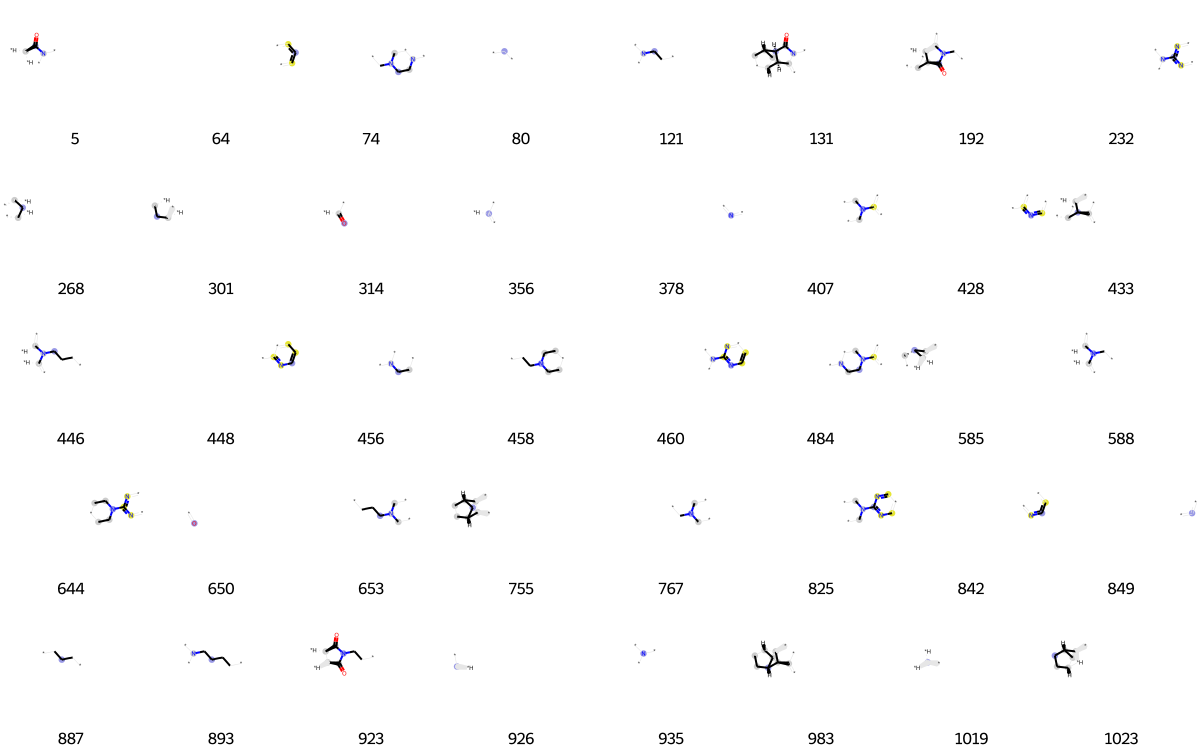

In [9612]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [9613]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[73,
 147,
 165,
 216,
 267,
 356,
 360,
 378,
 383,
 433,
 482,
 509,
 561,
 580,
 656,
 659,
 726,
 784,
 786,
 803,
 816,
 831,
 849,
 875,
 972]

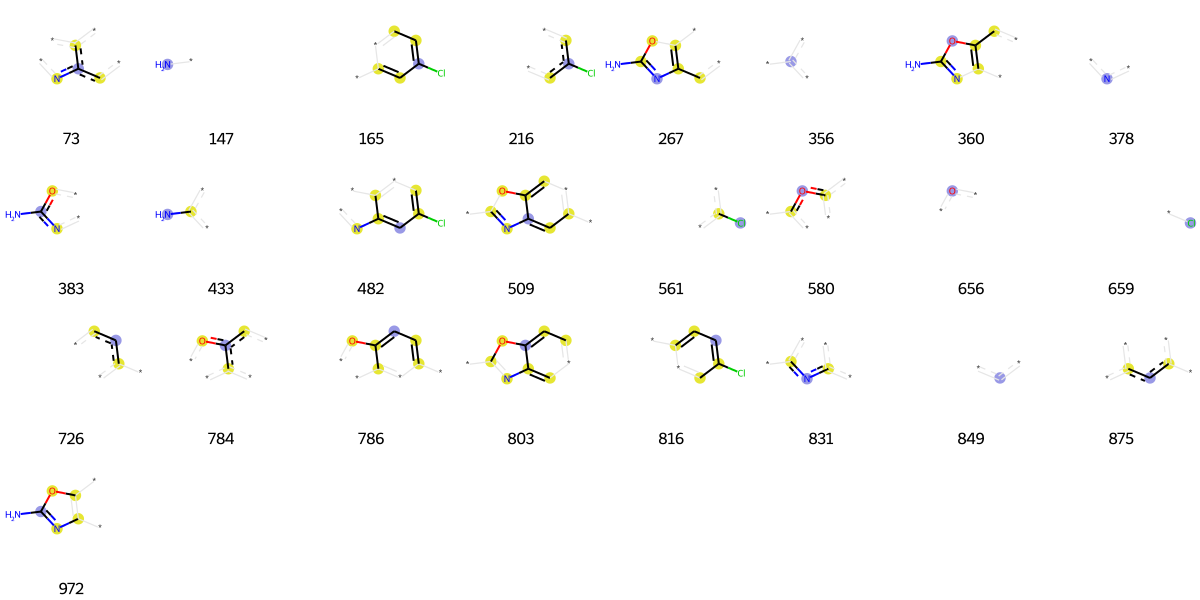

In [9614]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [9615]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[33,
 34,
 56,
 64,
 73,
 94,
 99,
 128,
 165,
 175,
 200,
 216,
 249,
 289,
 333,
 356,
 378,
 389,
 496,
 512,
 549,
 561,
 573,
 650,
 659,
 664,
 695,
 698,
 707,
 726,
 792,
 807,
 816,
 831,
 841,
 849,
 875,
 893,
 902,
 946,
 965,
 971,
 975,
 1006]

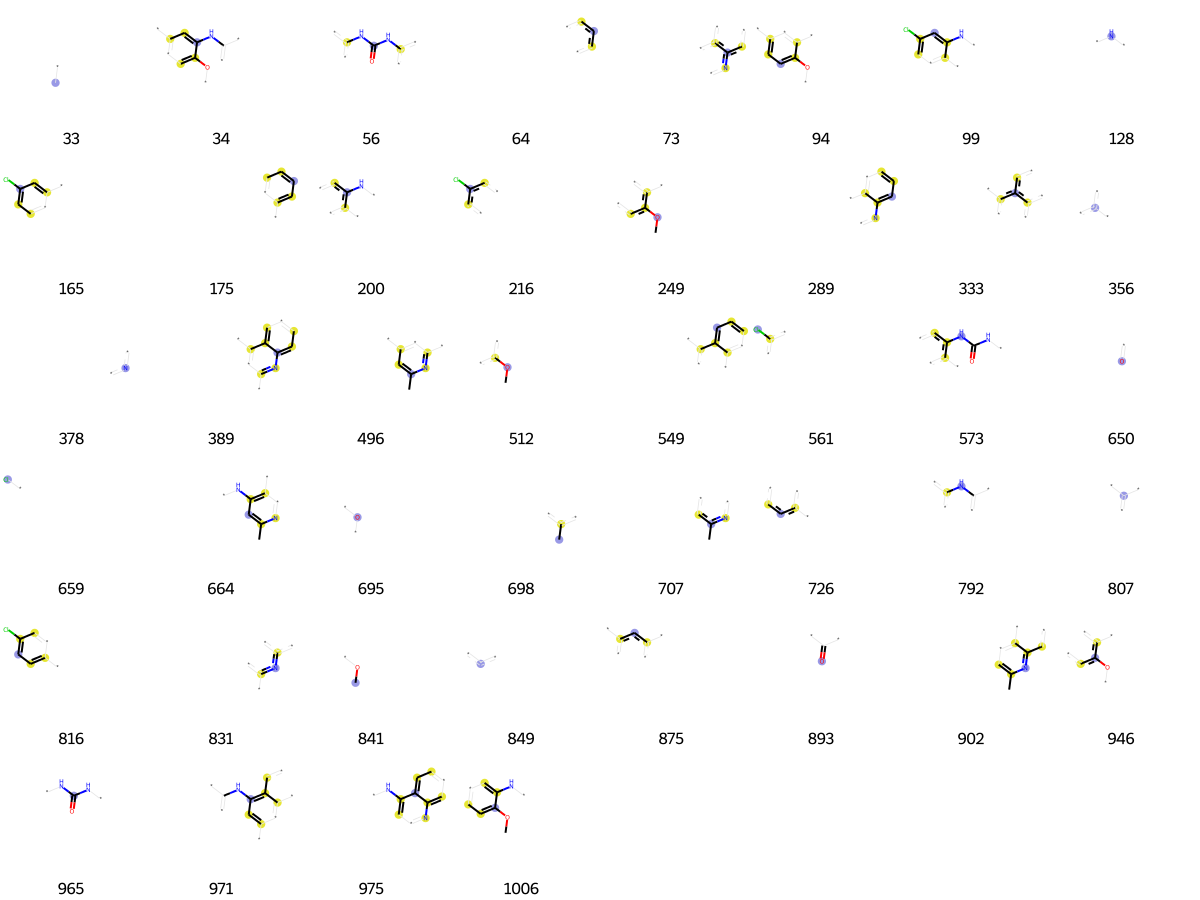

In [9616]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [9617]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[34,
 36,
 46,
 80,
 90,
 121,
 130,
 132,
 138,
 216,
 256,
 356,
 361,
 386,
 408,
 427,
 456,
 458,
 484,
 540,
 556,
 561,
 594,
 646,
 650,
 653,
 659,
 669,
 673,
 693,
 699,
 726,
 767,
 807,
 816,
 849,
 887,
 893,
 904,
 926,
 935,
 953,
 1021]

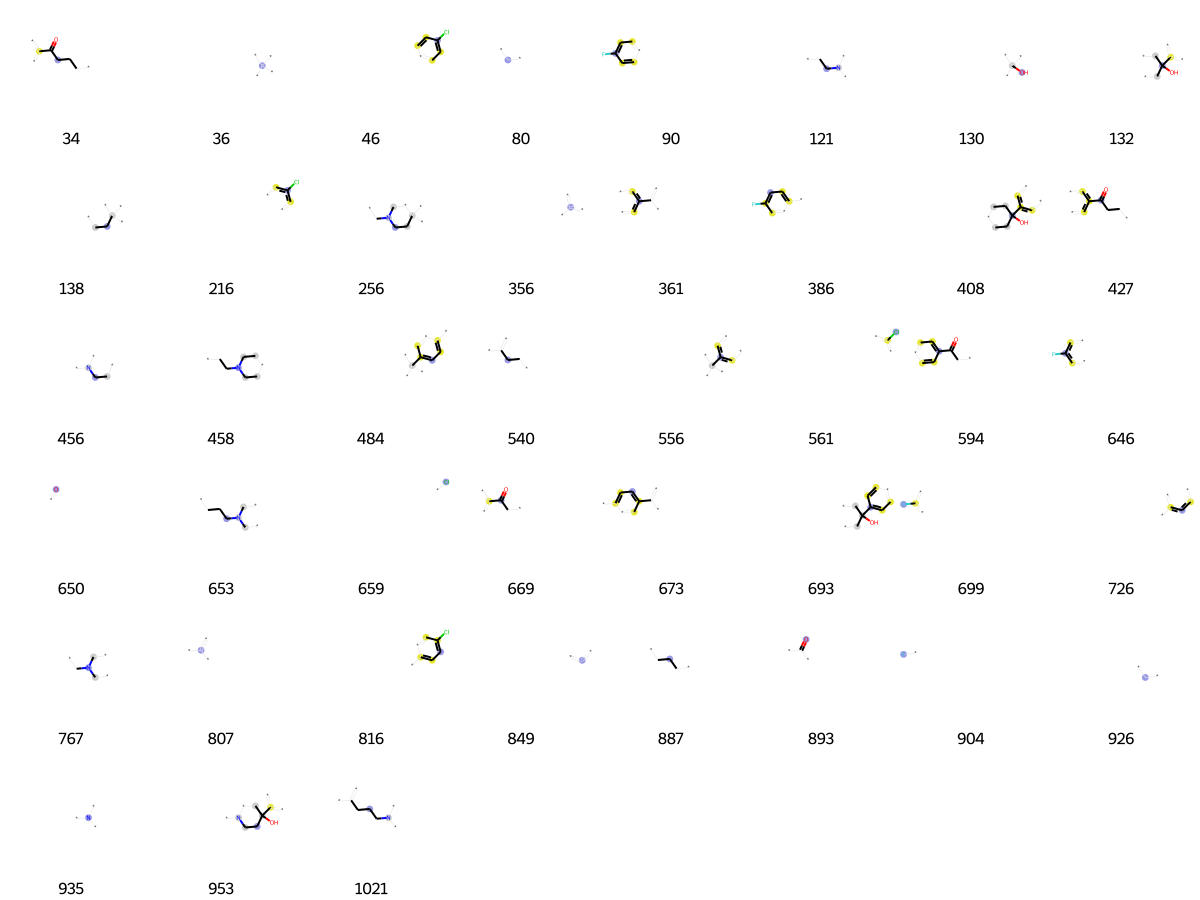

In [9618]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [9619]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[33,
 41,
 80,
 119,
 128,
 170,
 197,
 222,
 243,
 294,
 420,
 473,
 540,
 565,
 591,
 597,
 650,
 667,
 694,
 723,
 794,
 807,
 887,
 893]

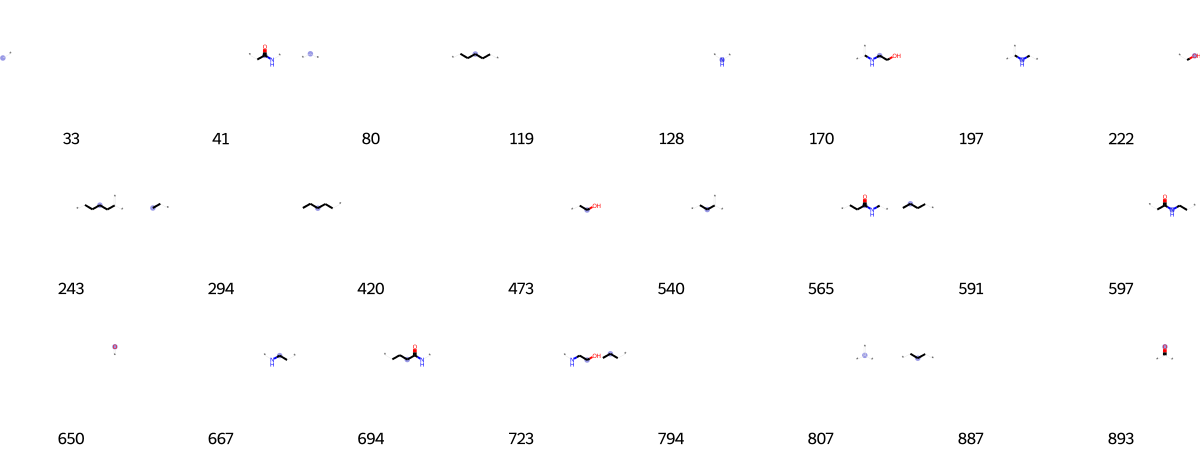

In [9620]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [9621]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[32,
 33,
 47,
 64,
 80,
 124,
 135,
 140,
 162,
 168,
 175,
 195,
 272,
 294,
 332,
 352,
 356,
 366,
 378,
 421,
 457,
 469,
 512,
 534,
 561,
 624,
 628,
 656,
 659,
 675,
 698,
 724,
 726,
 765,
 775,
 849,
 871,
 875,
 881,
 917,
 926,
 935,
 969,
 974,
 982,
 984]

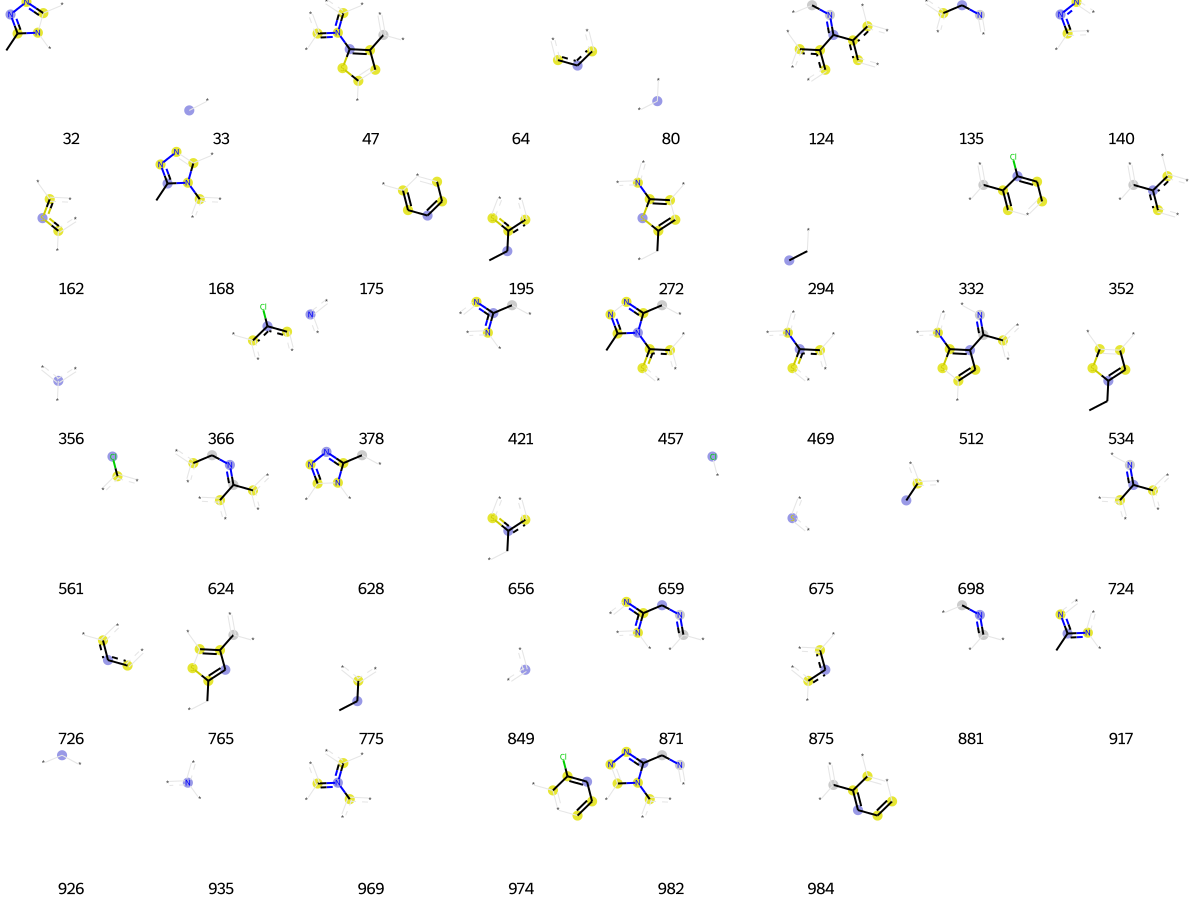

In [9622]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [9623]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[19,
 33,
 40,
 64,
 76,
 128,
 139,
 147,
 153,
 160,
 162,
 182,
 189,
 191,
 259,
 339,
 356,
 378,
 433,
 435,
 437,
 459,
 486,
 490,
 511,
 561,
 562,
 579,
 650,
 659,
 676,
 703,
 726,
 749,
 792,
 807,
 831,
 842,
 849,
 860,
 881,
 893,
 954]

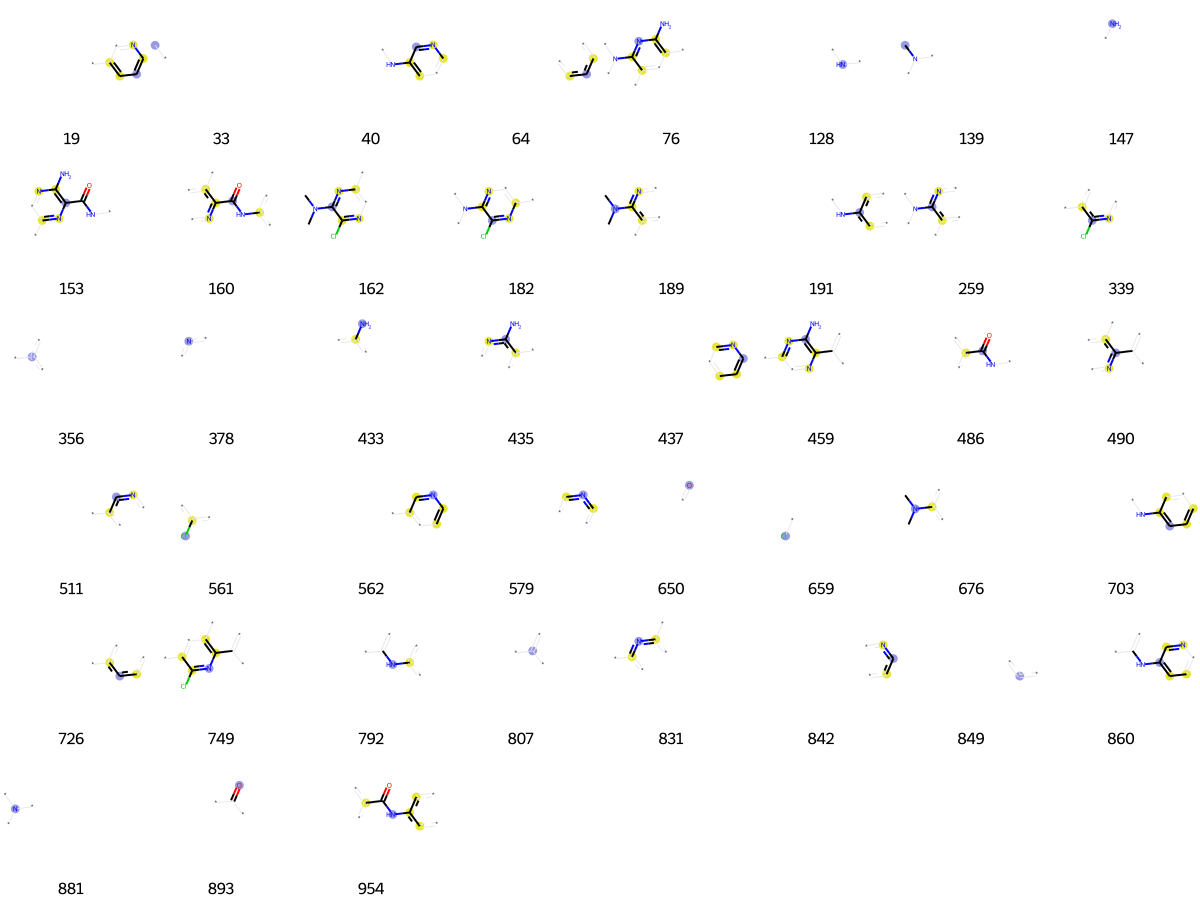

In [9624]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [9625]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[64,
 86,
 94,
 128,
 131,
 175,
 184,
 191,
 216,
 307,
 311,
 356,
 366,
 378,
 383,
 428,
 448,
 471,
 486,
 494,
 511,
 546,
 552,
 557,
 561,
 593,
 628,
 650,
 659,
 695,
 705,
 726,
 792,
 807,
 816,
 842,
 843,
 849,
 855,
 875,
 893,
 946,
 954,
 976]

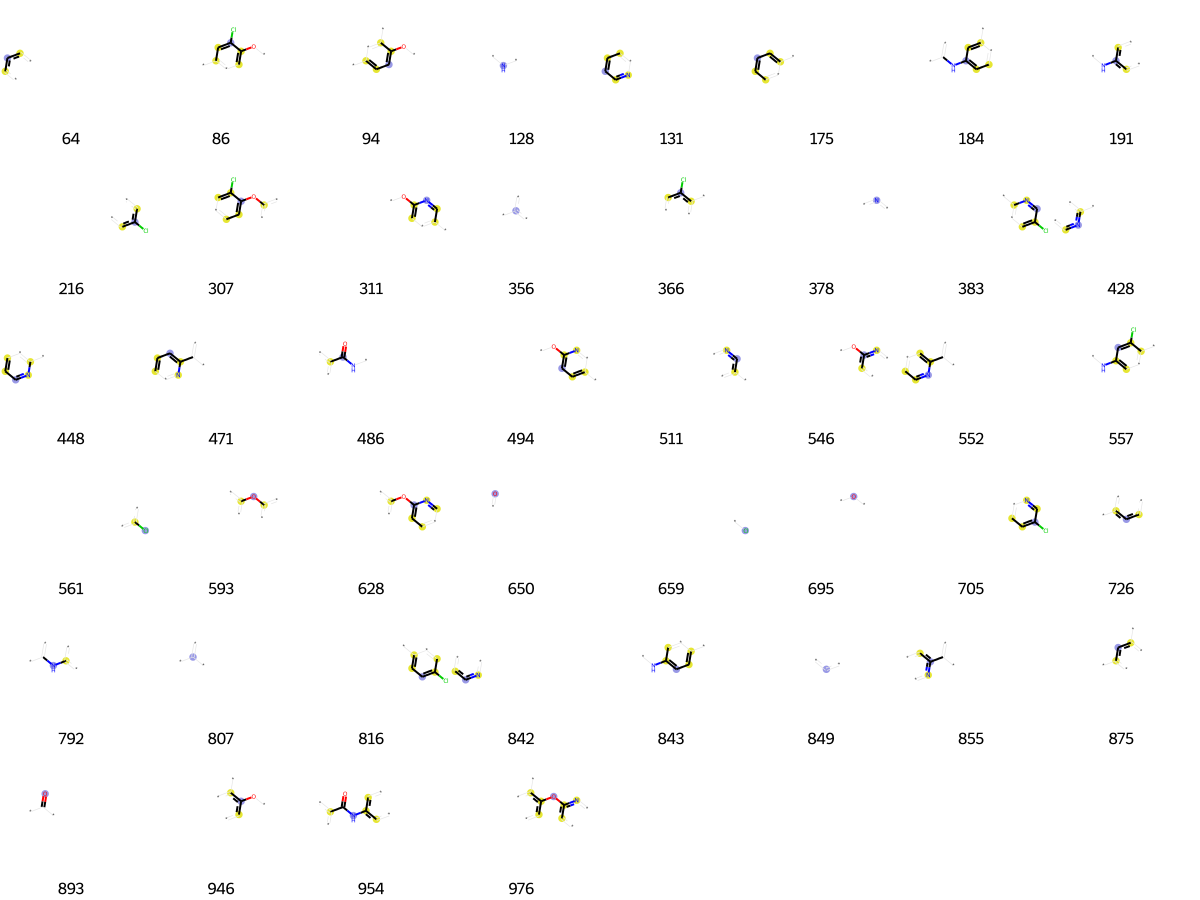

In [9626]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [9627]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[17,
 24,
 33,
 36,
 53,
 59,
 73,
 80,
 102,
 104,
 107,
 130,
 139,
 206,
 210,
 212,
 226,
 231,
 232,
 233,
 236,
 242,
 248,
 250,
 256,
 266,
 268,
 277,
 279,
 285,
 293,
 294,
 299,
 314,
 317,
 348,
 356,
 357,
 362,
 387,
 463,
 471,
 485,
 530,
 533,
 589,
 591,
 598,
 633,
 650,
 652,
 653,
 656,
 663,
 679,
 687,
 693,
 694,
 695,
 700,
 711,
 722,
 739,
 750,
 798,
 807,
 835,
 841,
 843,
 846,
 849,
 856,
 862,
 869,
 881,
 893,
 897,
 898,
 912,
 926,
 936,
 937,
 967,
 970,
 996,
 1004,
 1019]

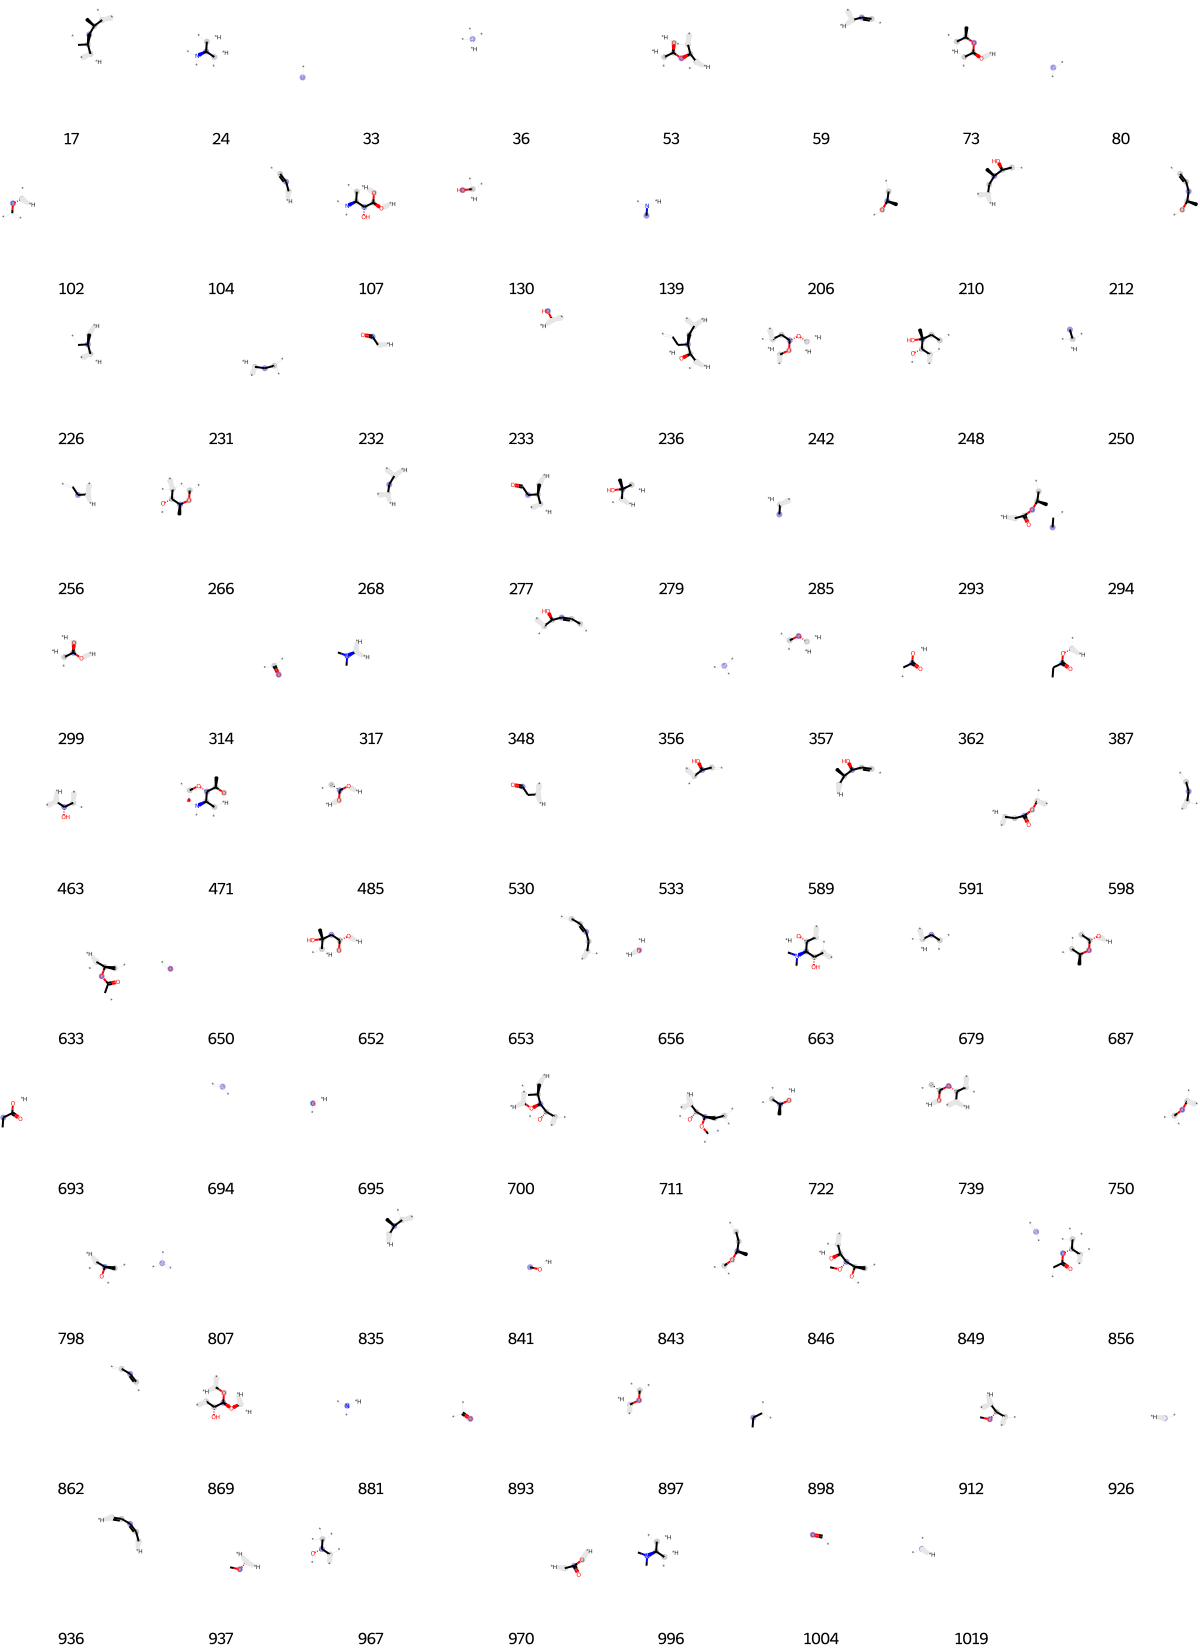

In [9628]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [9629]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[3,
 13,
 15,
 25,
 33,
 36,
 64,
 112,
 128,
 136,
 148,
 149,
 193,
 250,
 251,
 301,
 356,
 361,
 378,
 412,
 422,
 455,
 463,
 480,
 487,
 497,
 558,
 602,
 650,
 668,
 673,
 689,
 710,
 720,
 726,
 785,
 792,
 807,
 819,
 831,
 849,
 893,
 896,
 898,
 926,
 932,
 935,
 943,
 974,
 985,
 1019]

In [9630]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[2,
 4,
 13,
 25,
 33,
 50,
 71,
 79,
 80,
 121,
 145,
 147,
 230,
 249,
 280,
 317,
 356,
 366,
 398,
 433,
 456,
 458,
 512,
 533,
 561,
 568,
 649,
 650,
 659,
 695,
 767,
 807,
 841,
 849,
 875,
 893,
 910,
 926,
 935,
 946,
 967,
 974]

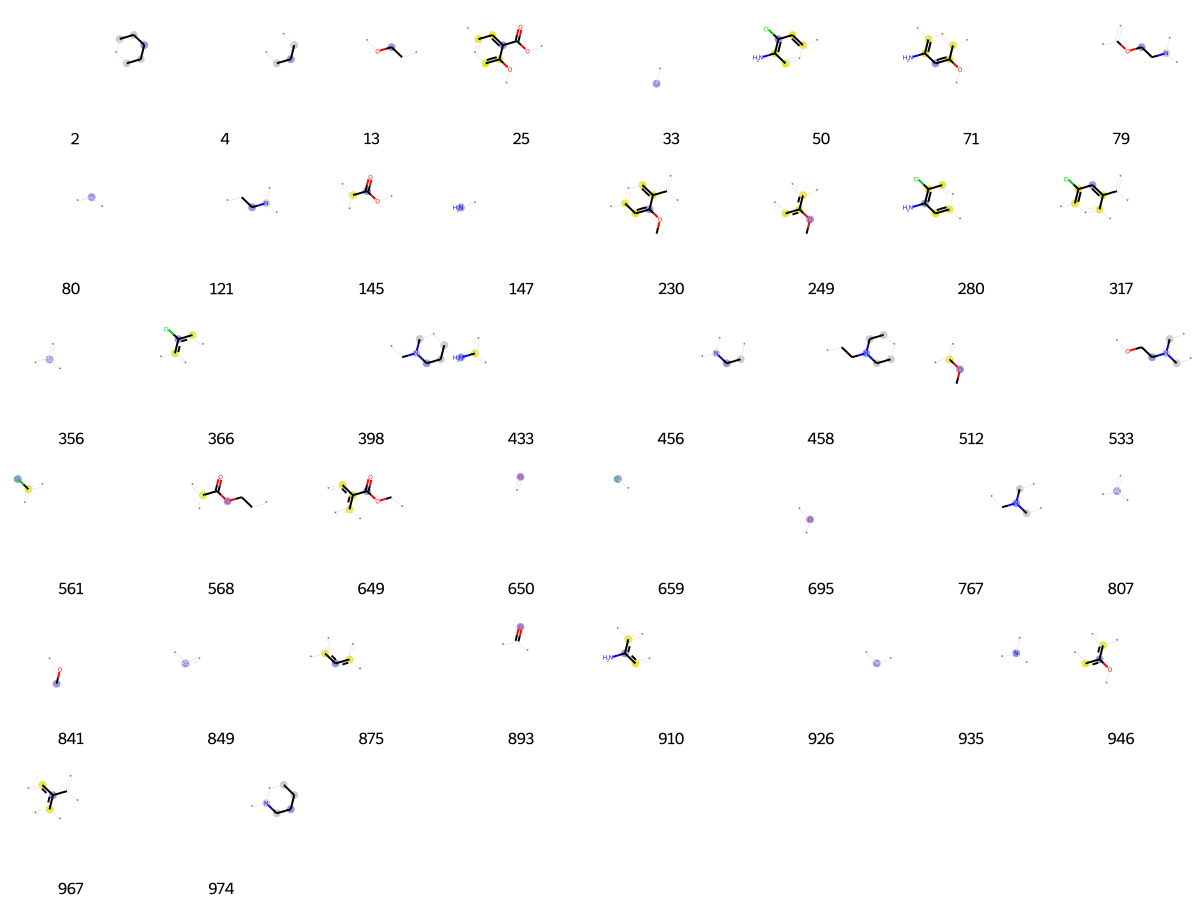

In [9631]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [9632]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 41,
 80,
 117,
 128,
 147,
 173,
 197,
 229,
 283,
 321,
 339,
 389,
 390,
 403,
 416,
 435,
 540,
 551,
 573,
 600,
 650,
 713,
 736,
 739,
 767,
 786,
 807,
 820,
 825,
 865,
 875,
 893,
 895,
 900]

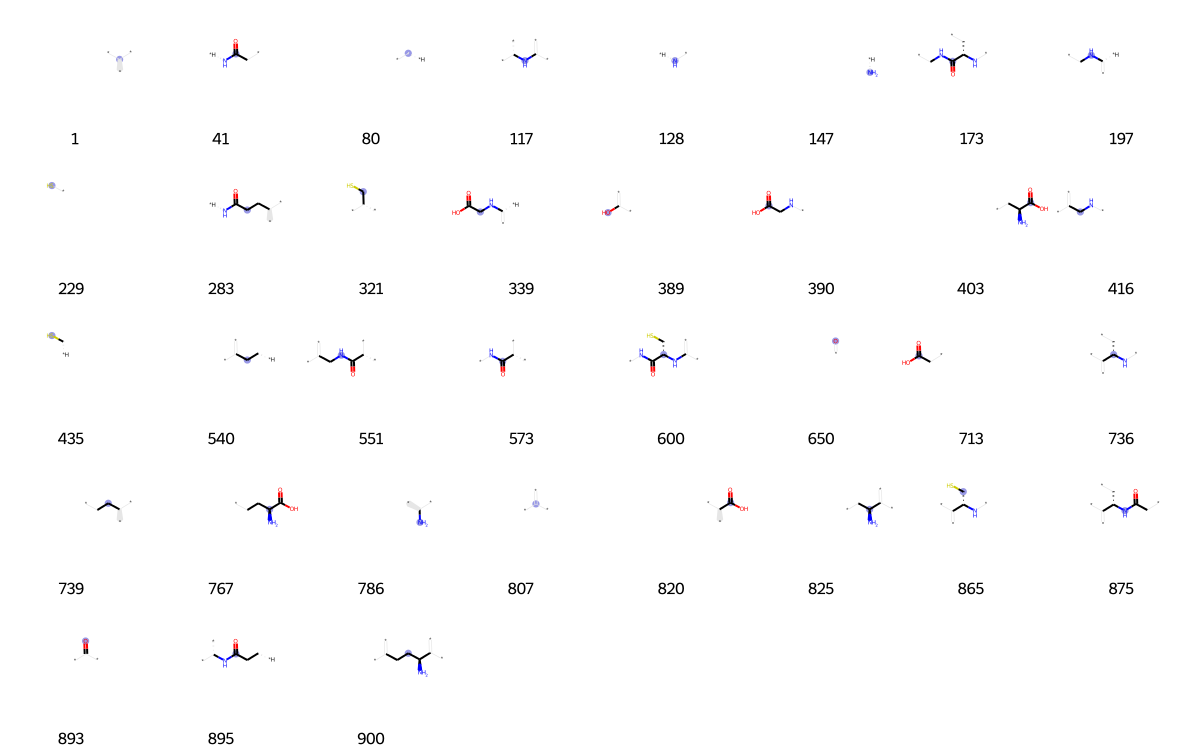

In [9633]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [9634]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[1,
 15,
 33,
 36,
 53,
 59,
 64,
 73,
 80,
 87,
 90,
 114,
 116,
 138,
 156,
 165,
 168,
 172,
 175,
 185,
 186,
 189,
 202,
 203,
 216,
 219,
 237,
 300,
 325,
 329,
 334,
 341,
 356,
 372,
 378,
 392,
 419,
 461,
 480,
 482,
 507,
 513,
 525,
 557,
 560,
 561,
 573,
 584,
 588,
 591,
 650,
 659,
 694,
 715,
 726,
 739,
 785,
 807,
 816,
 831,
 835,
 849,
 875,
 876,
 884,
 893,
 901,
 915,
 926,
 977,
 998,
 1000,
 1009,
 1017]

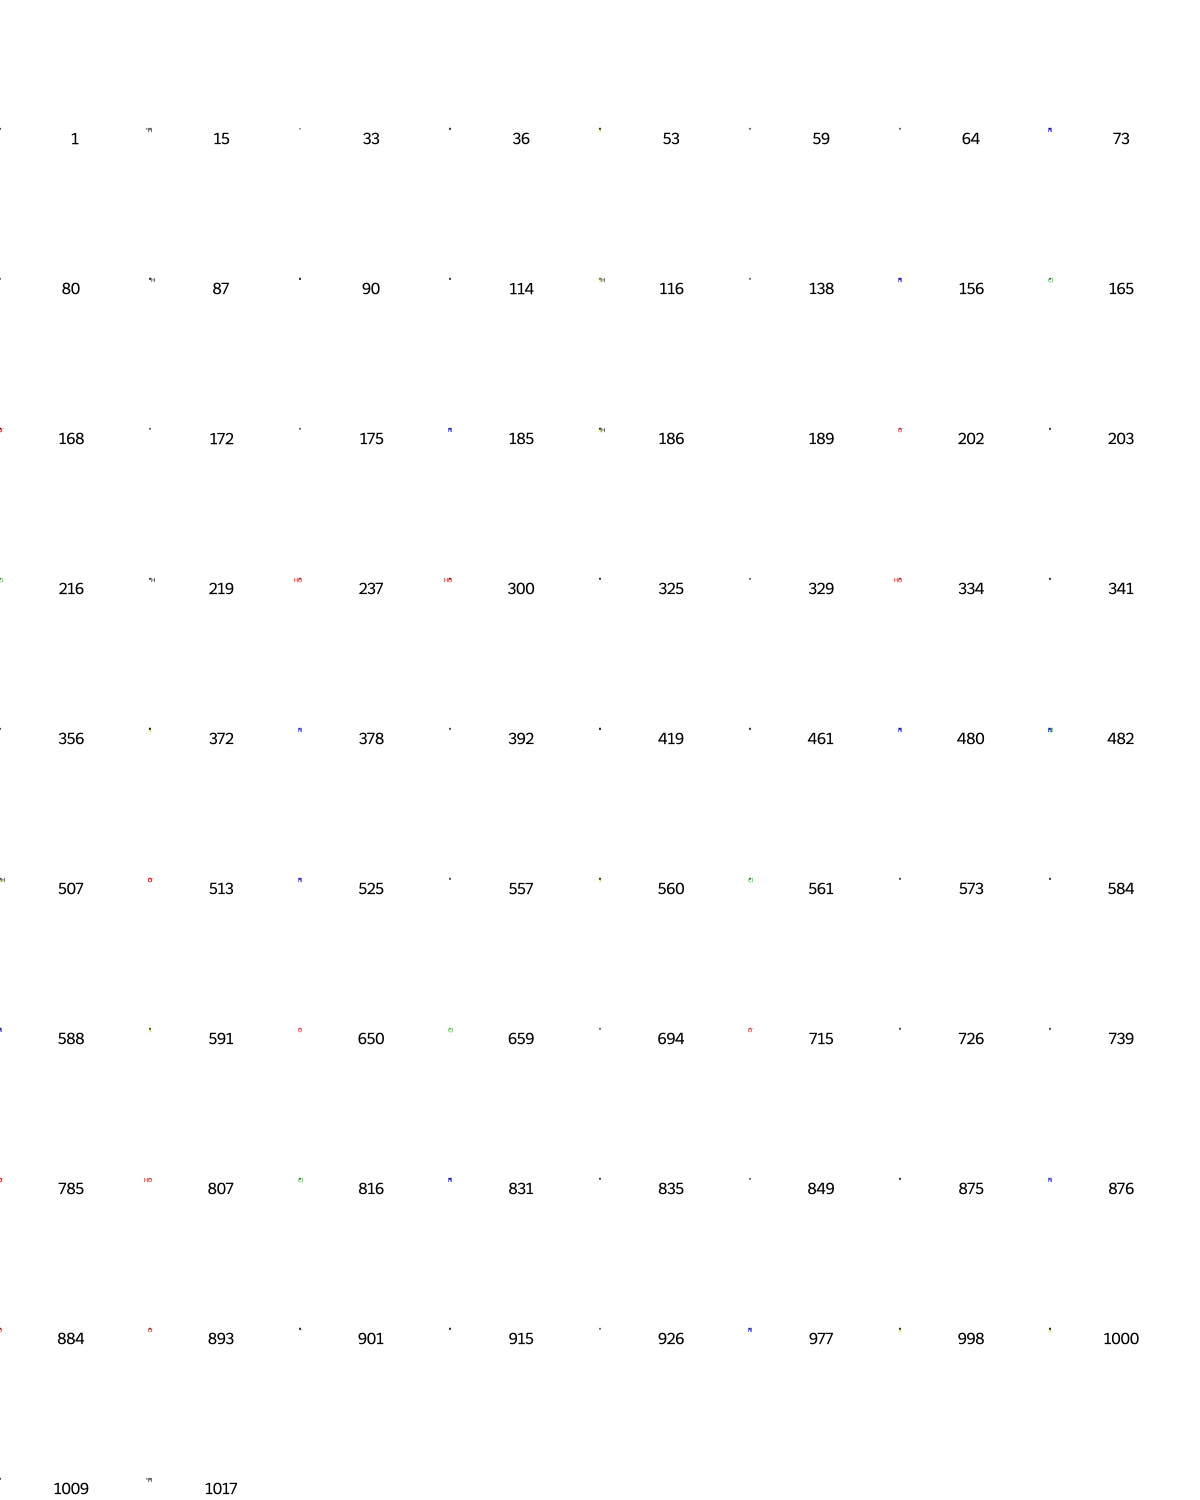

In [9635]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [9636]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[4,
 14,
 22,
 31,
 33,
 64,
 74,
 77,
 80,
 94,
 116,
 121,
 143,
 165,
 175,
 207,
 212,
 231,
 271,
 289,
 294,
 341,
 356,
 389,
 397,
 446,
 456,
 458,
 508,
 561,
 588,
 599,
 623,
 650,
 653,
 670,
 675,
 694,
 726,
 744,
 767,
 804,
 807,
 811,
 849,
 875,
 887,
 893,
 917,
 926,
 935,
 949,
 976,
 1020]

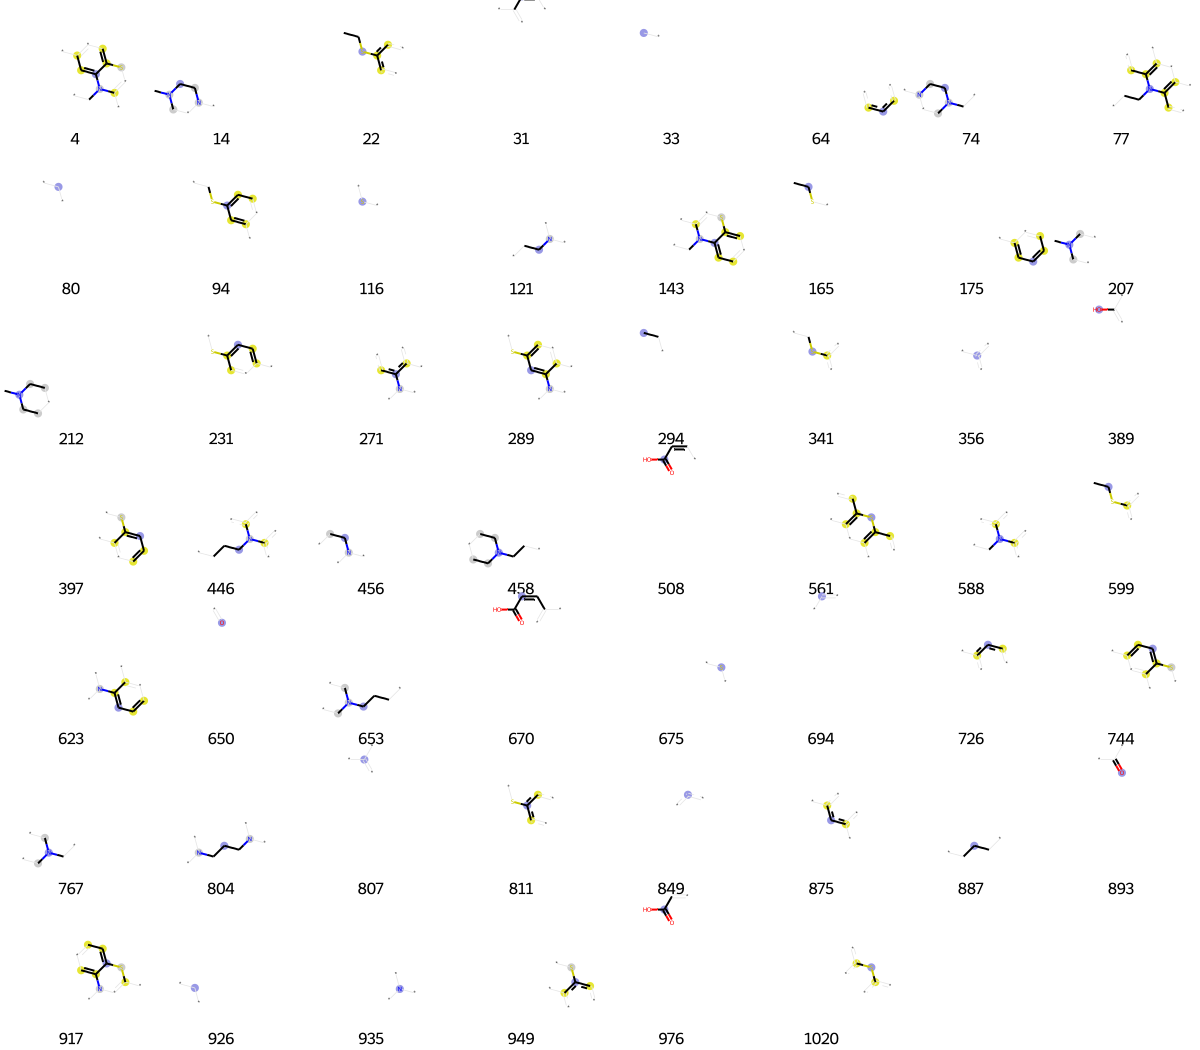

In [9637]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [9638]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[4,
 33,
 36,
 46,
 53,
 54,
 70,
 73,
 80,
 99,
 106,
 124,
 125,
 130,
 160,
 172,
 191,
 207,
 221,
 231,
 233,
 256,
 268,
 272,
 285,
 288,
 301,
 305,
 314,
 322,
 342,
 349,
 356,
 364,
 368,
 370,
 456,
 489,
 516,
 547,
 552,
 582,
 597,
 621,
 632,
 634,
 641,
 647,
 650,
 656,
 684,
 694,
 695,
 698,
 703,
 750,
 783,
 784,
 786,
 798,
 807,
 825,
 841,
 849,
 861,
 879,
 882,
 890,
 918,
 926,
 935,
 936,
 937,
 940,
 941,
 948,
 955,
 960,
 974,
 989,
 990,
 1000,
 1002,
 1017,
 1019]

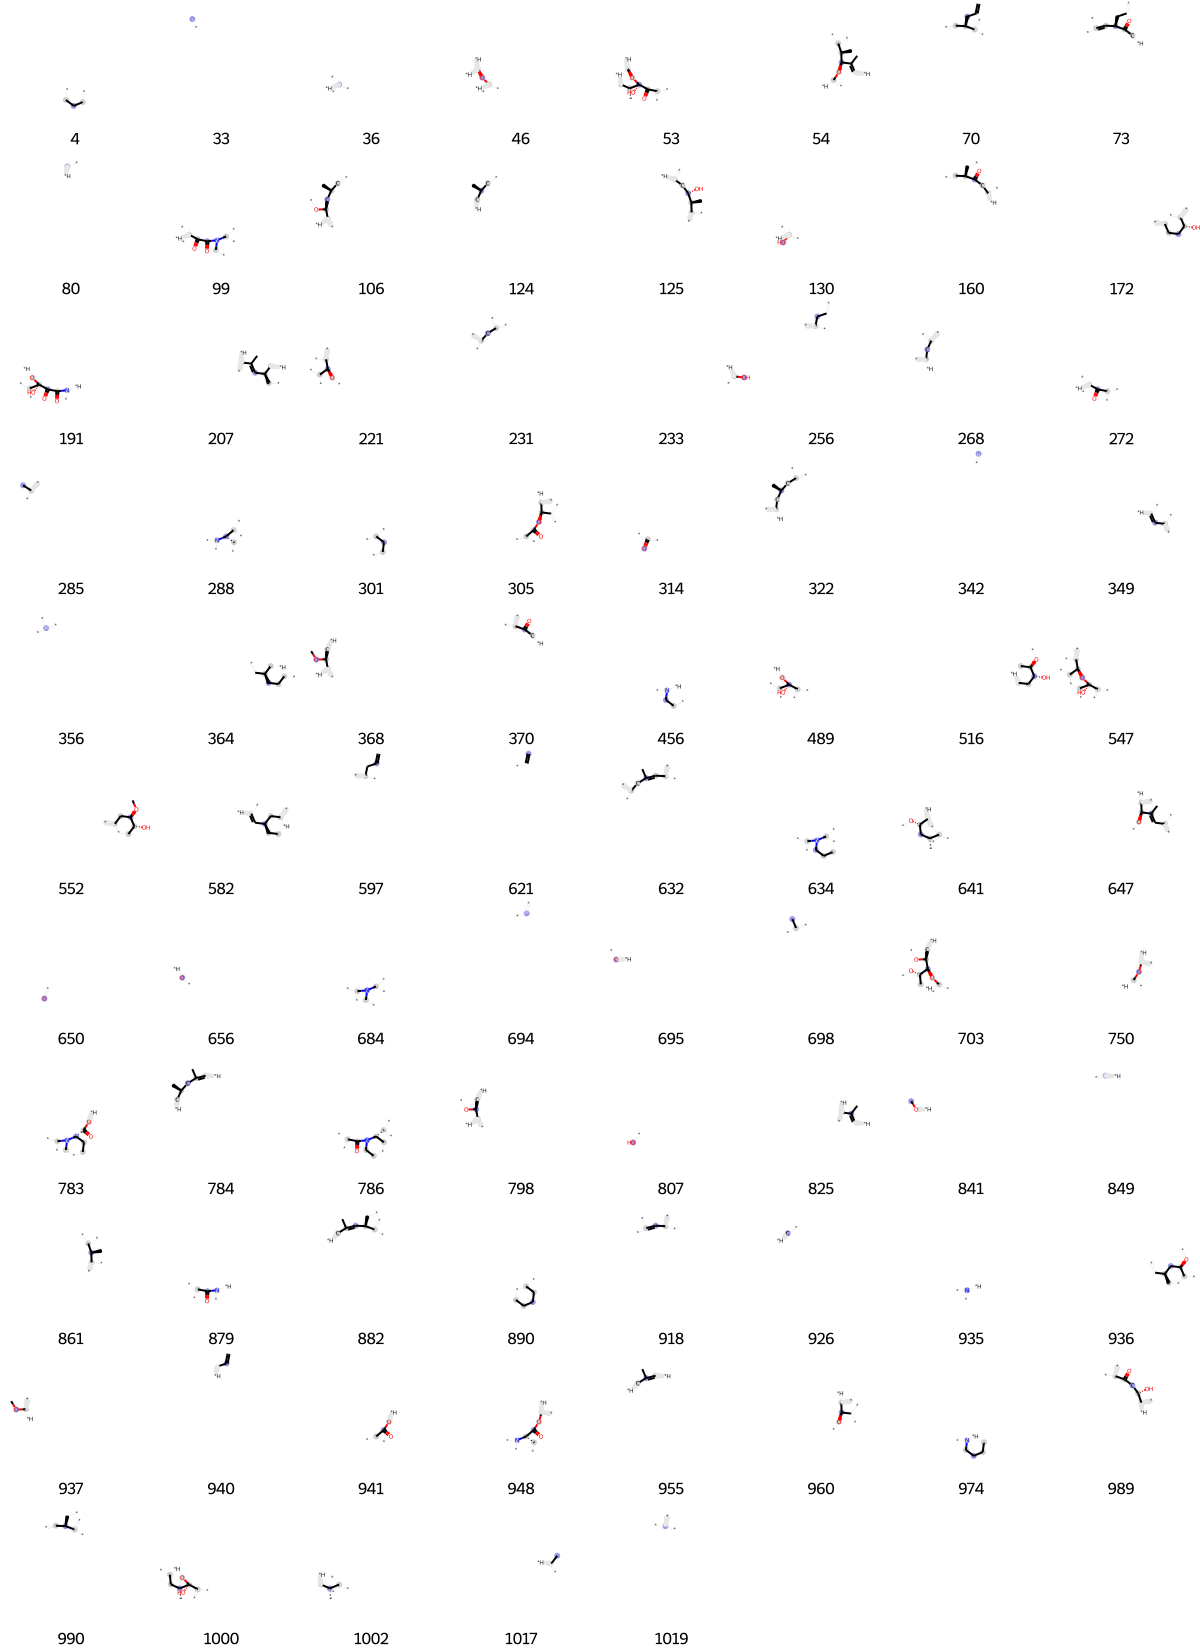

In [9639]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [9640]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[15,
 25,
 33,
 42,
 64,
 73,
 74,
 80,
 90,
 104,
 121,
 126,
 210,
 218,
 219,
 231,
 238,
 271,
 289,
 305,
 314,
 333,
 335,
 356,
 378,
 389,
 394,
 404,
 407,
 433,
 456,
 458,
 484,
 623,
 631,
 646,
 650,
 698,
 707,
 709,
 726,
 730,
 767,
 774,
 801,
 831,
 842,
 849,
 875,
 898,
 902,
 926,
 935,
 952,
 994]

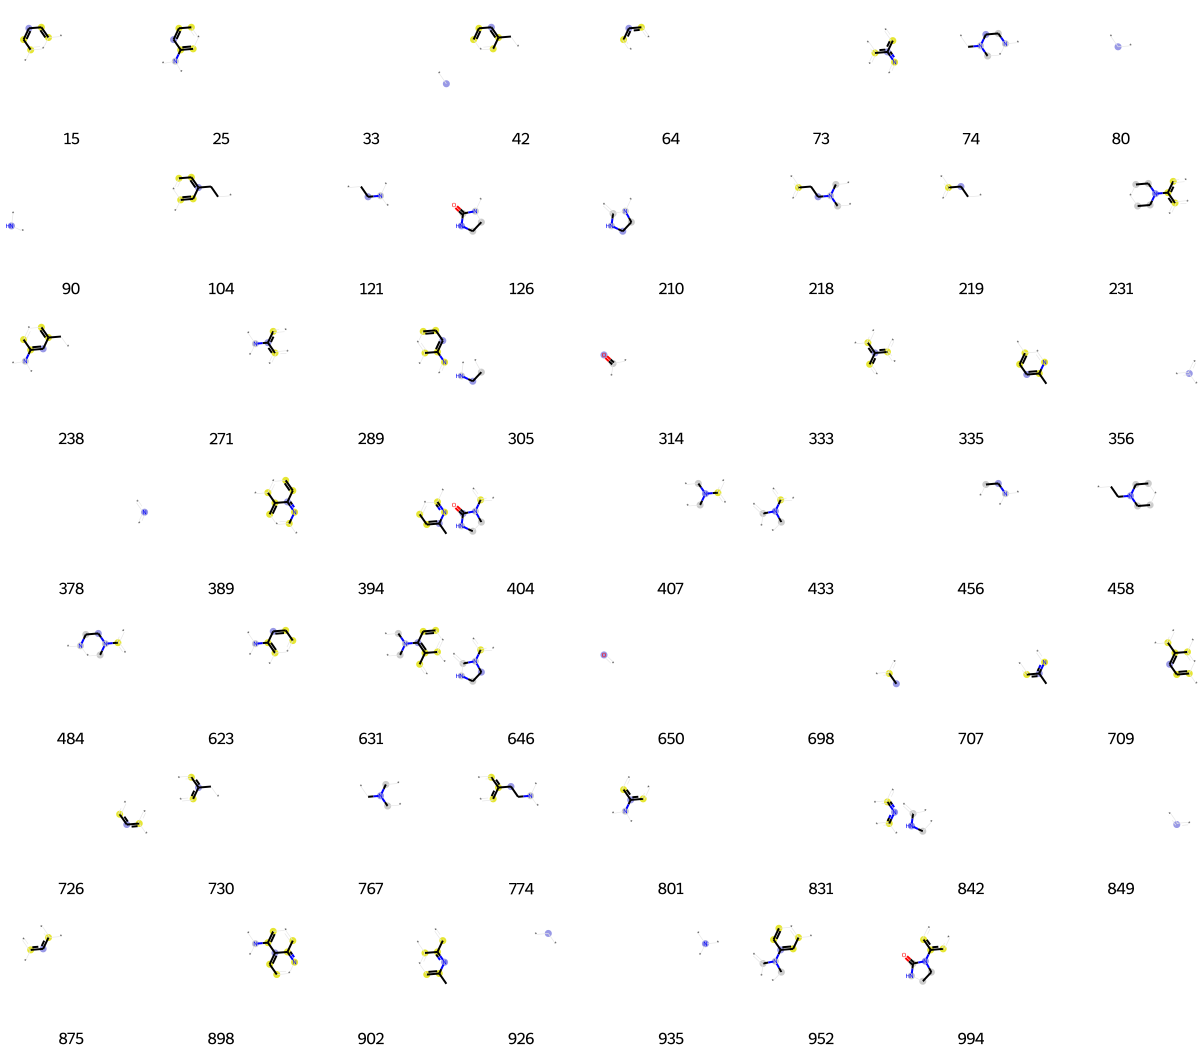

In [9641]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [9642]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[12,
 37,
 90,
 106,
 140,
 147,
 258,
 309,
 342,
 356,
 366,
 378,
 428,
 578,
 650,
 713,
 779,
 806,
 807,
 834,
 849,
 893]

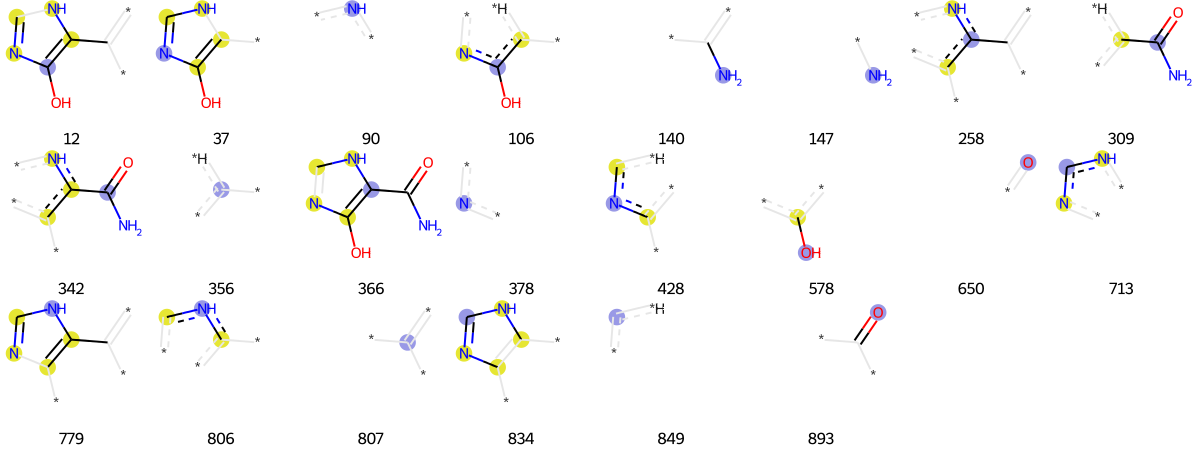

In [9643]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [9644]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[4,
 14,
 23,
 53,
 61,
 64,
 128,
 175,
 191,
 246,
 307,
 319,
 349,
 350,
 356,
 378,
 385,
 389,
 423,
 428,
 452,
 456,
 479,
 486,
 501,
 502,
 543,
 554,
 623,
 650,
 675,
 715,
 726,
 792,
 807,
 842,
 843,
 847,
 849,
 883,
 893,
 905,
 954,
 967]

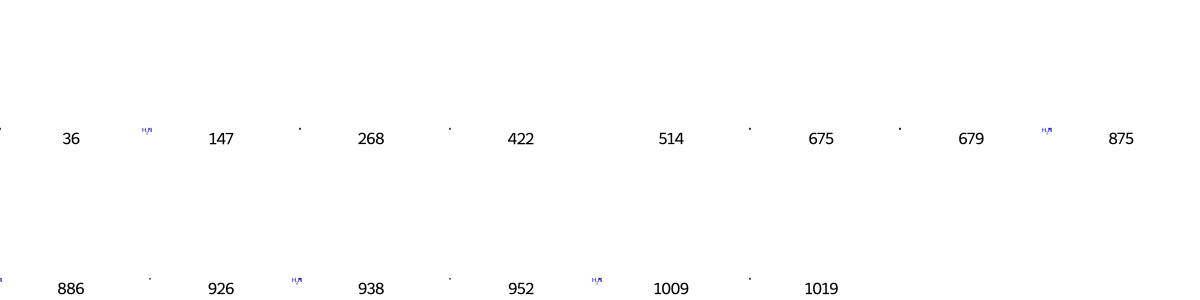

In [9645]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [9646]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[64,
 74,
 80,
 96,
 114,
 118,
 121,
 170,
 173,
 175,
 193,
 205,
 222,
 236,
 277,
 288,
 352,
 356,
 393,
 397,
 401,
 429,
 456,
 458,
 473,
 498,
 561,
 641,
 675,
 694,
 726,
 744,
 767,
 770,
 807,
 809,
 849,
 875,
 904,
 926,
 935,
 942,
 949,
 984,
 1005,
 1020]

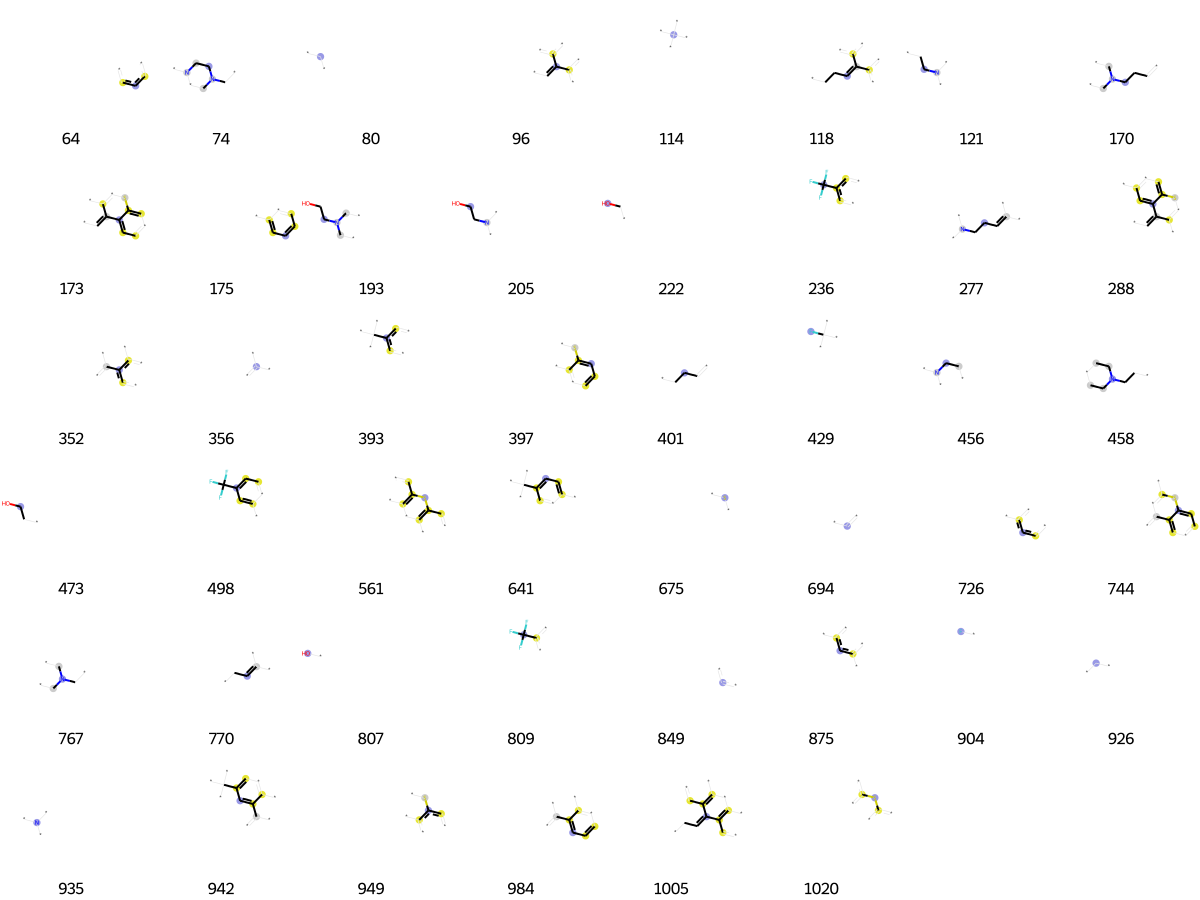

In [9647]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [9648]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[33,
 46,
 76,
 80,
 116,
 125,
 128,
 139,
 158,
 169,
 174,
 197,
 221,
 250,
 255,
 274,
 331,
 345,
 356,
 406,
 507,
 514,
 580,
 599,
 650,
 652,
 656,
 667,
 694,
 715,
 725,
 726,
 740,
 748,
 753,
 762,
 807,
 838,
 849,
 881,
 893,
 910,
 929,
 939,
 953,
 970]

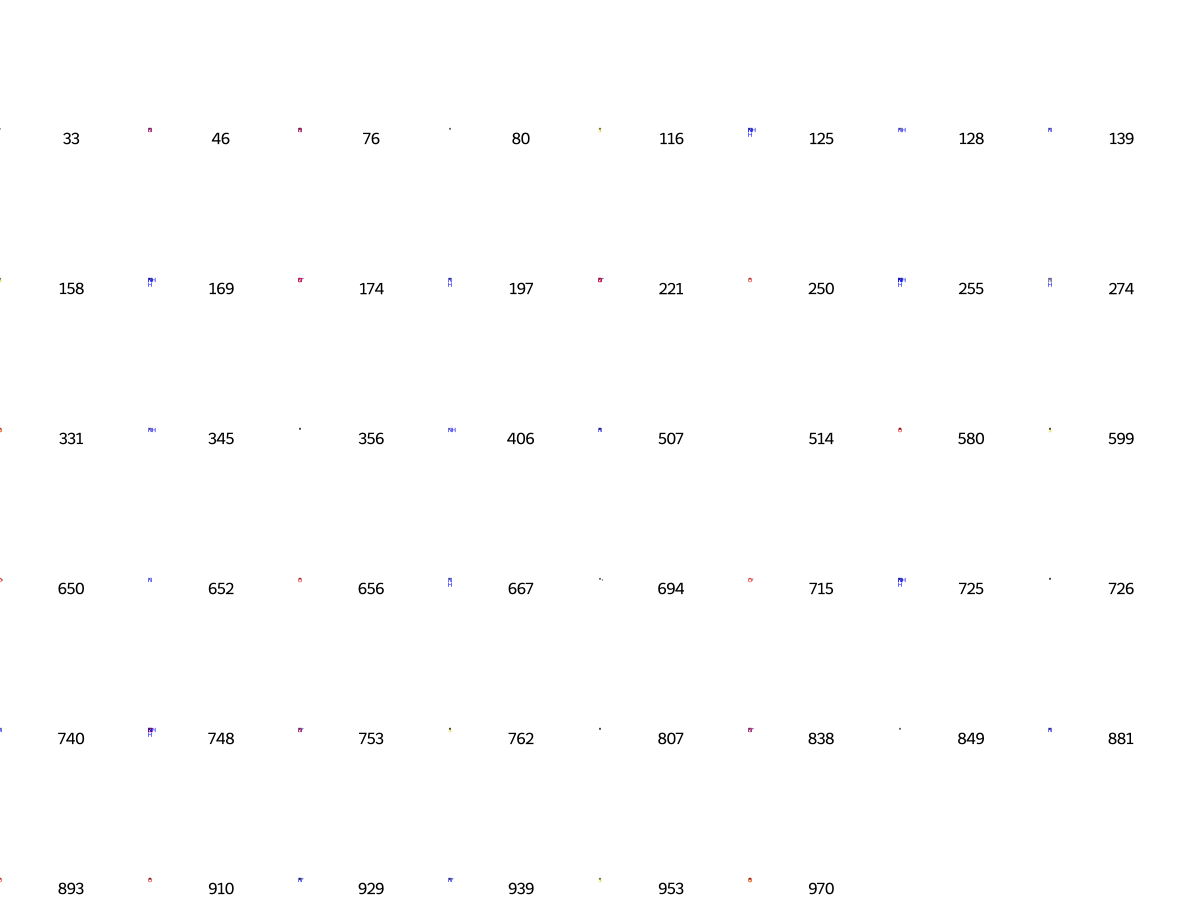

In [9649]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [9650]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[15,
 33,
 64,
 65,
 72,
 128,
 139,
 161,
 191,
 228,
 261,
 285,
 288,
 322,
 329,
 346,
 355,
 356,
 378,
 381,
 428,
 491,
 511,
 544,
 558,
 562,
 563,
 578,
 593,
 595,
 628,
 676,
 695,
 703,
 726,
 745,
 807,
 849,
 875,
 881]

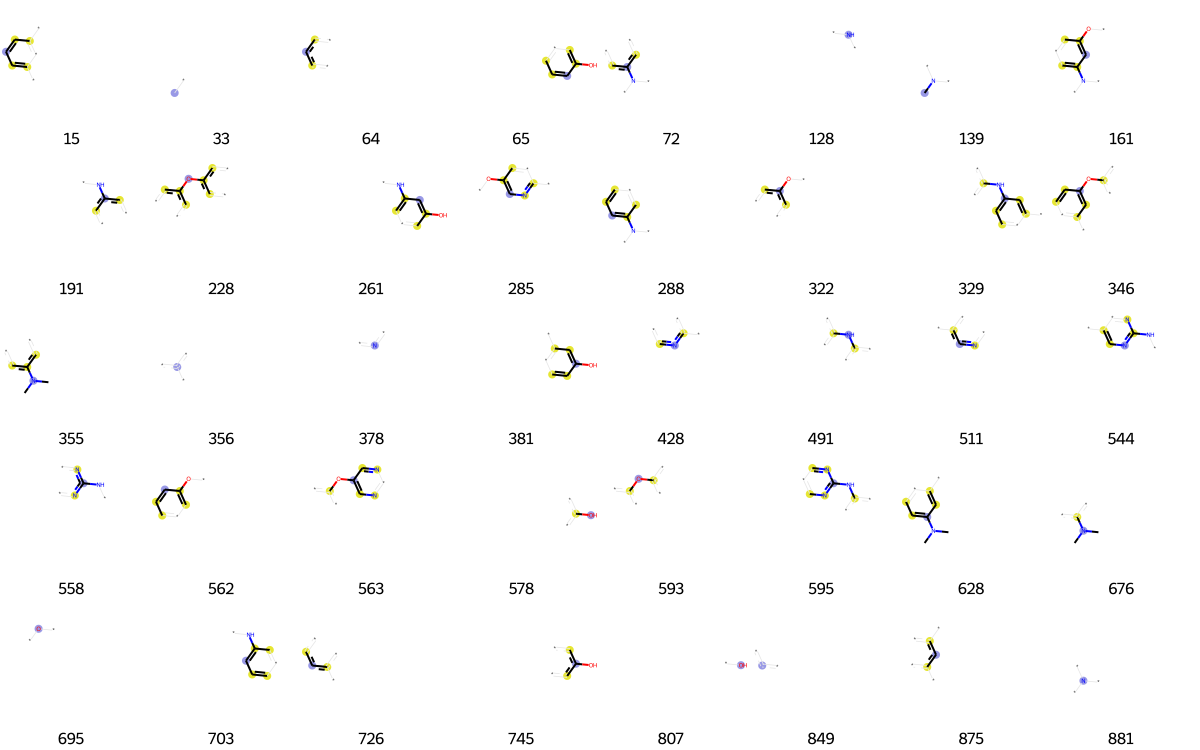

In [9651]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [9652]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[1,
 4,
 11,
 33,
 41,
 80,
 117,
 119,
 128,
 220,
 227,
 243,
 294,
 341,
 356,
 375,
 398,
 420,
 441,
 456,
 465,
 505,
 540,
 591,
 623,
 631,
 650,
 656,
 694,
 726,
 738,
 749,
 752,
 767,
 794,
 807,
 824,
 829,
 836,
 849,
 875,
 881,
 887,
 893,
 895,
 898,
 926,
 935,
 950,
 966,
 974,
 1005]

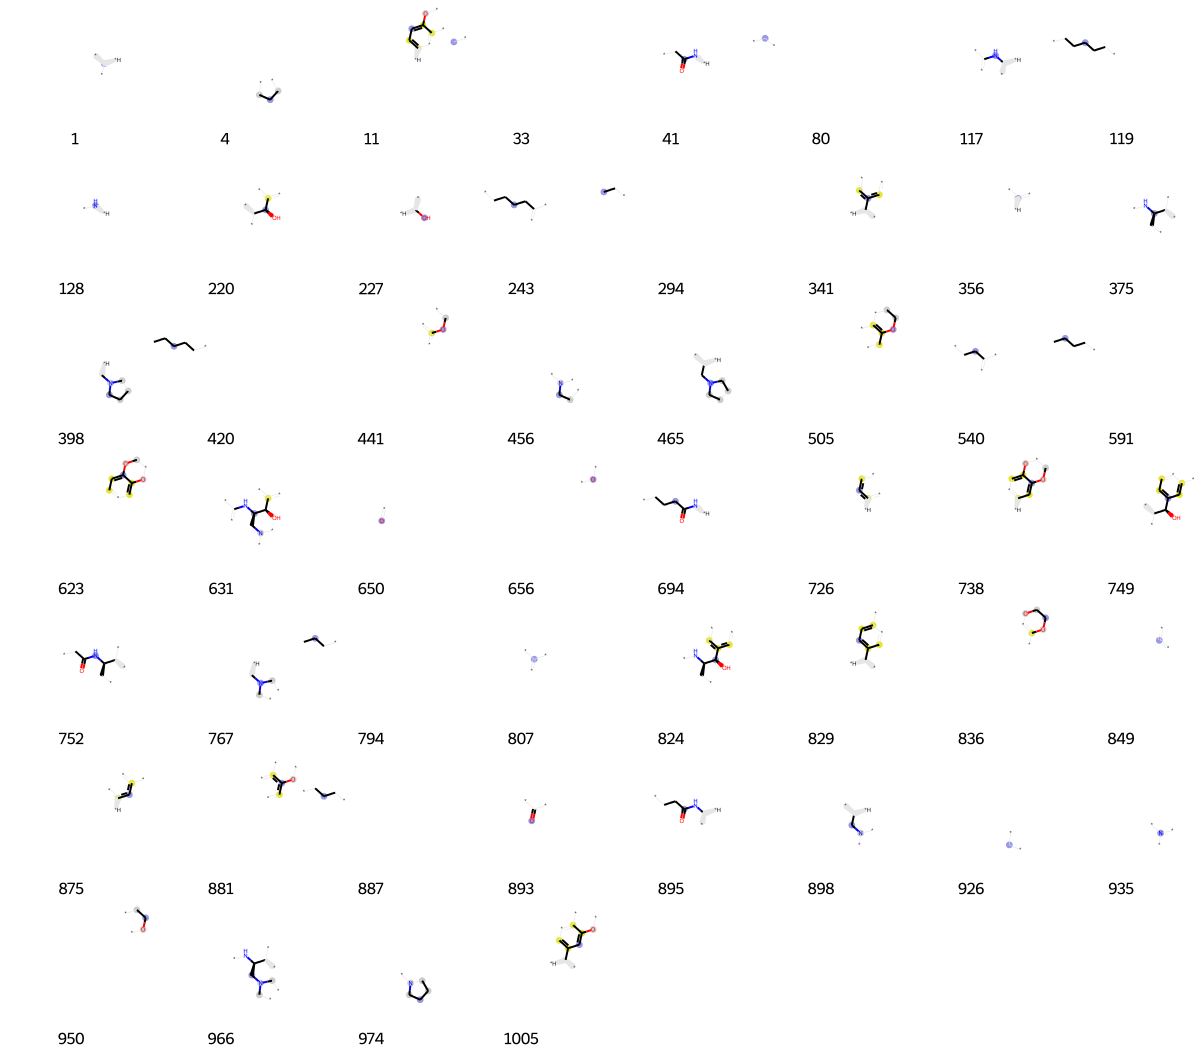

In [9653]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [9654]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[3,
 15,
 25,
 64,
 74,
 77,
 80,
 100,
 121,
 158,
 165,
 175,
 180,
 216,
 312,
 314,
 356,
 378,
 384,
 407,
 456,
 458,
 484,
 496,
 514,
 561,
 592,
 600,
 650,
 653,
 659,
 687,
 726,
 767,
 771,
 801,
 804,
 819,
 849,
 875,
 887,
 919,
 923,
 926,
 932,
 935,
 945,
 992]

In [9655]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[25,
 90,
 128,
 140,
 147,
 193,
 220,
 228,
 270,
 309,
 318,
 322,
 356,
 386,
 502,
 593,
 646,
 650,
 694,
 695,
 699,
 718,
 725,
 726,
 807,
 843,
 849,
 864,
 893,
 904,
 924,
 984,
 1009]

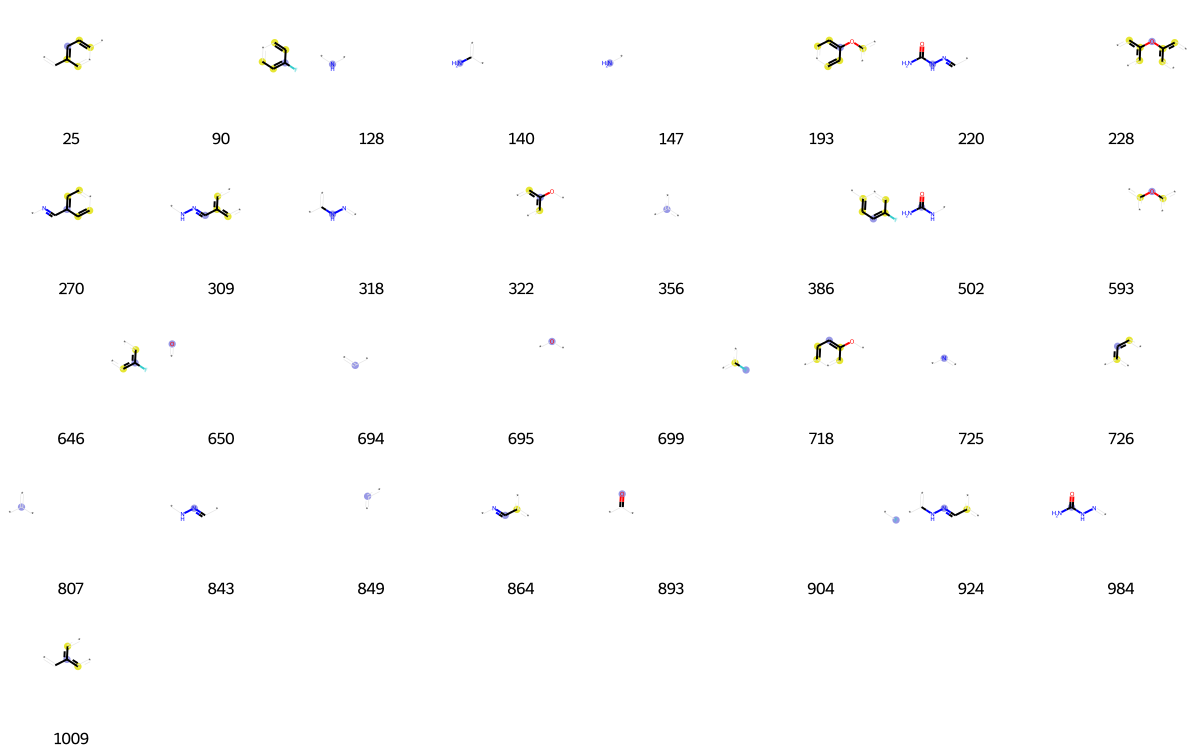

In [9656]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [9657]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[64,
 73,
 144,
 147,
 168,
 175,
 185,
 189,
 250,
 276,
 289,
 319,
 350,
 356,
 377,
 378,
 428,
 433,
 452,
 511,
 523,
 565,
 641,
 650,
 675,
 715,
 726,
 780,
 806,
 831,
 846,
 849,
 855,
 888,
 961]

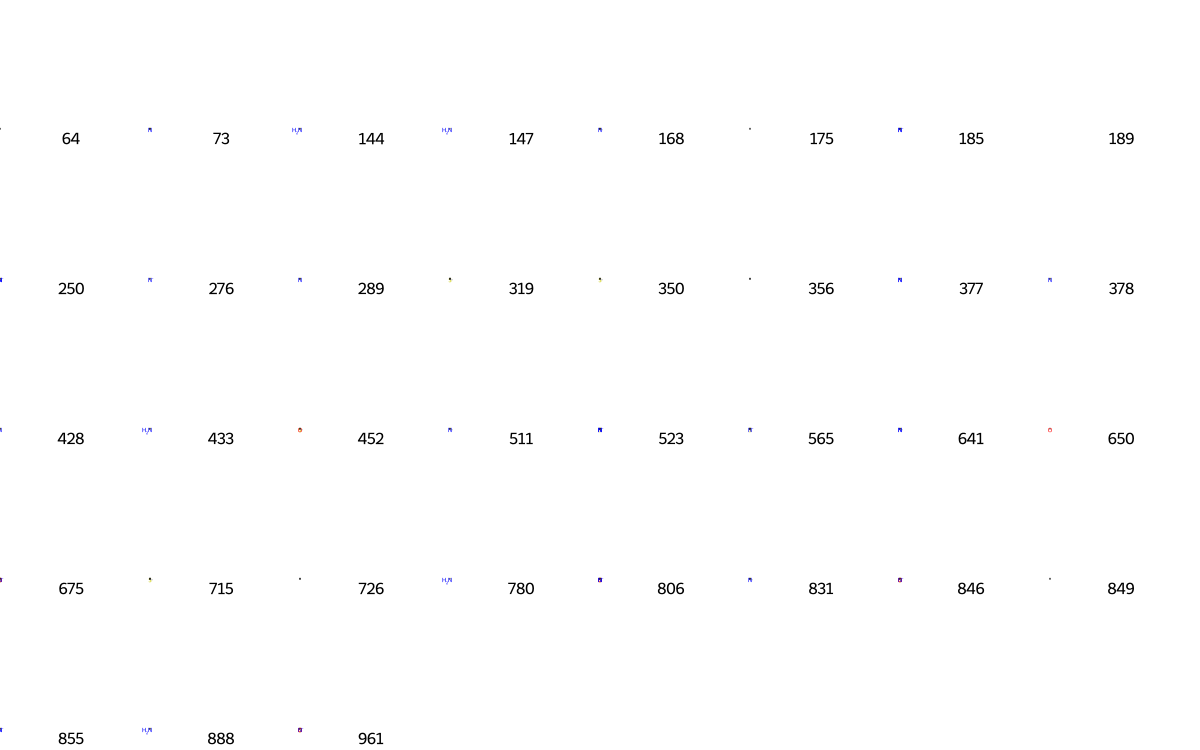

In [9658]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [9659]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[19,
 33,
 42,
 46,
 64,
 80,
 128,
 136,
 165,
 185,
 197,
 216,
 252,
 255,
 271,
 289,
 351,
 356,
 366,
 378,
 437,
 486,
 490,
 511,
 539,
 549,
 561,
 562,
 579,
 645,
 650,
 659,
 698,
 714,
 726,
 730,
 791,
 807,
 813,
 816,
 820,
 828,
 842,
 849,
 871,
 875,
 891,
 893,
 896,
 932,
 935,
 947,
 970,
 1020]

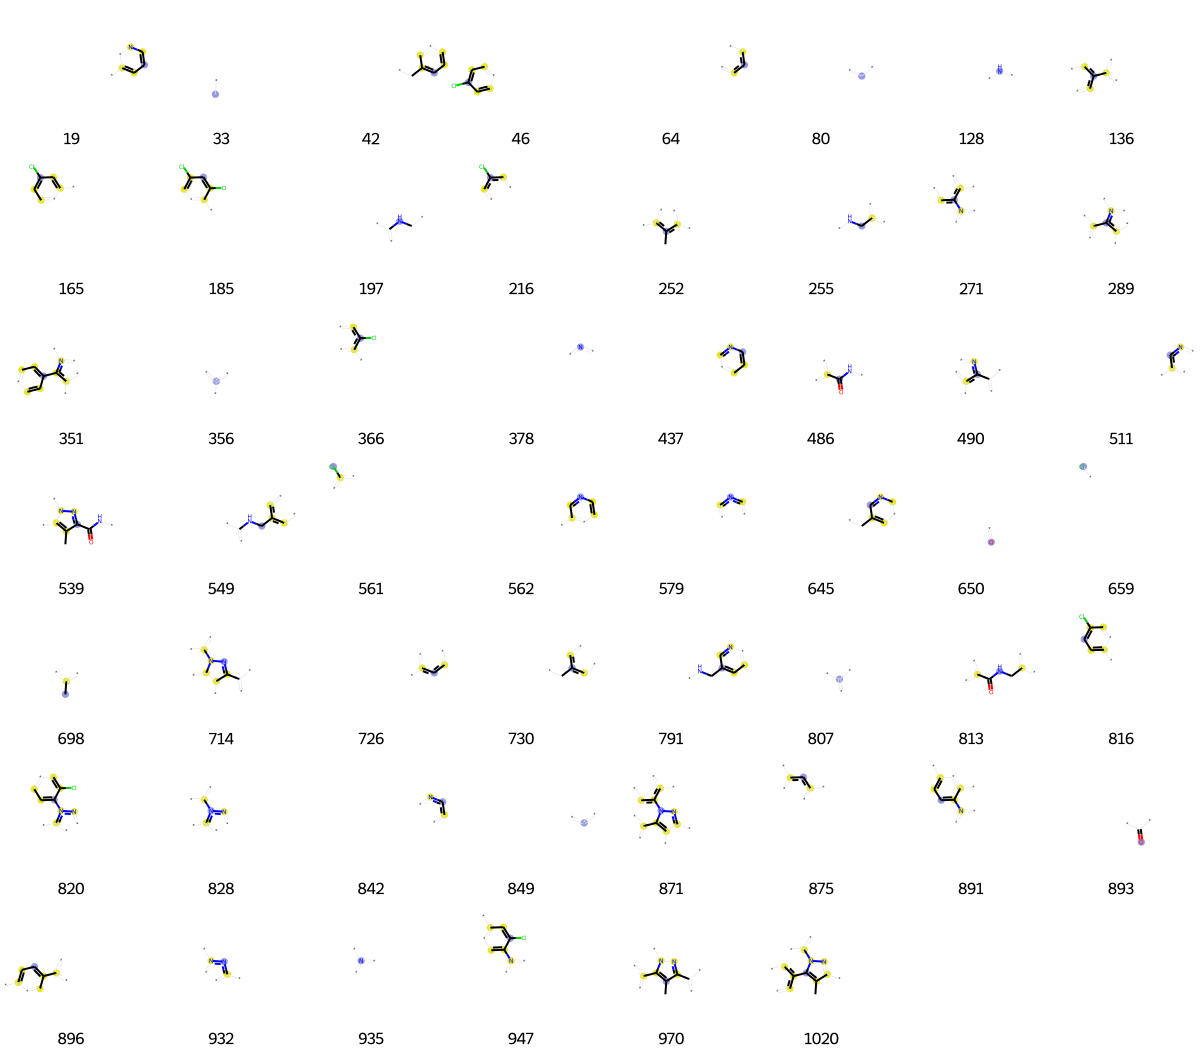

In [9660]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [9661]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[1,
 33,
 36,
 80,
 90,
 224,
 243,
 283,
 314,
 325,
 342,
 356,
 426,
 431,
 440,
 527,
 549,
 621,
 626,
 650,
 694,
 713,
 733,
 823,
 824,
 940,
 950]

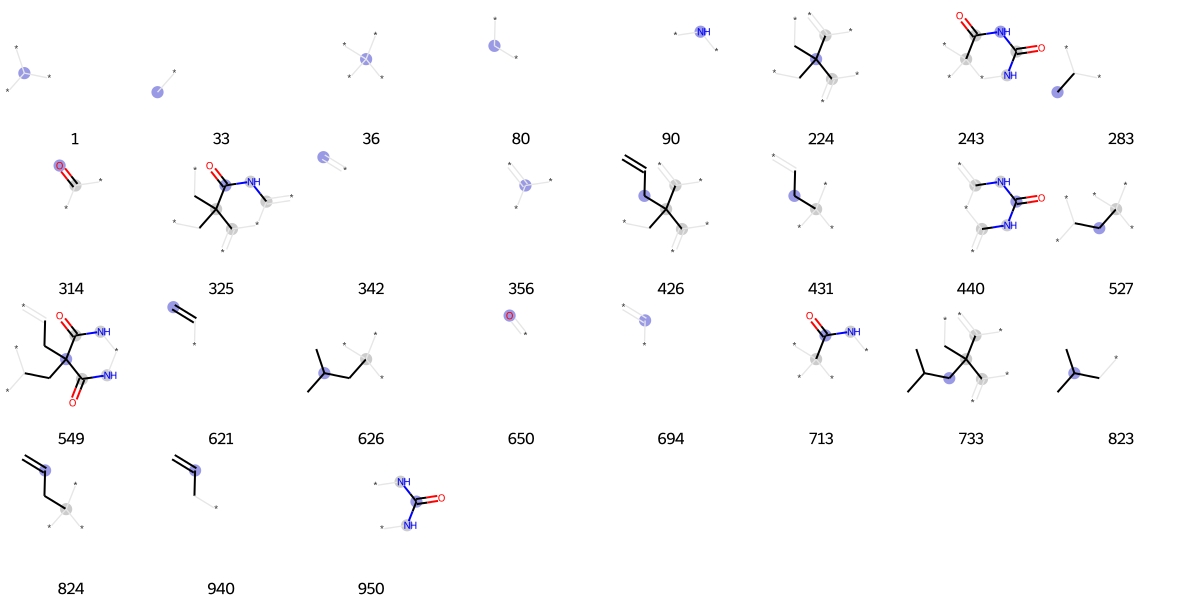

In [9662]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [9663]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[14,
 15,
 56,
 64,
 66,
 73,
 80,
 90,
 104,
 128,
 130,
 131,
 144,
 162,
 165,
 184,
 191,
 207,
 216,
 219,
 330,
 356,
 376,
 378,
 385,
 404,
 414,
 428,
 511,
 543,
 550,
 554,
 561,
 567,
 592,
 650,
 656,
 659,
 675,
 703,
 713,
 719,
 725,
 726,
 751,
 758,
 789,
 792,
 806,
 807,
 834,
 836,
 849,
 875,
 893,
 908,
 943,
 965,
 966,
 972,
 1004]

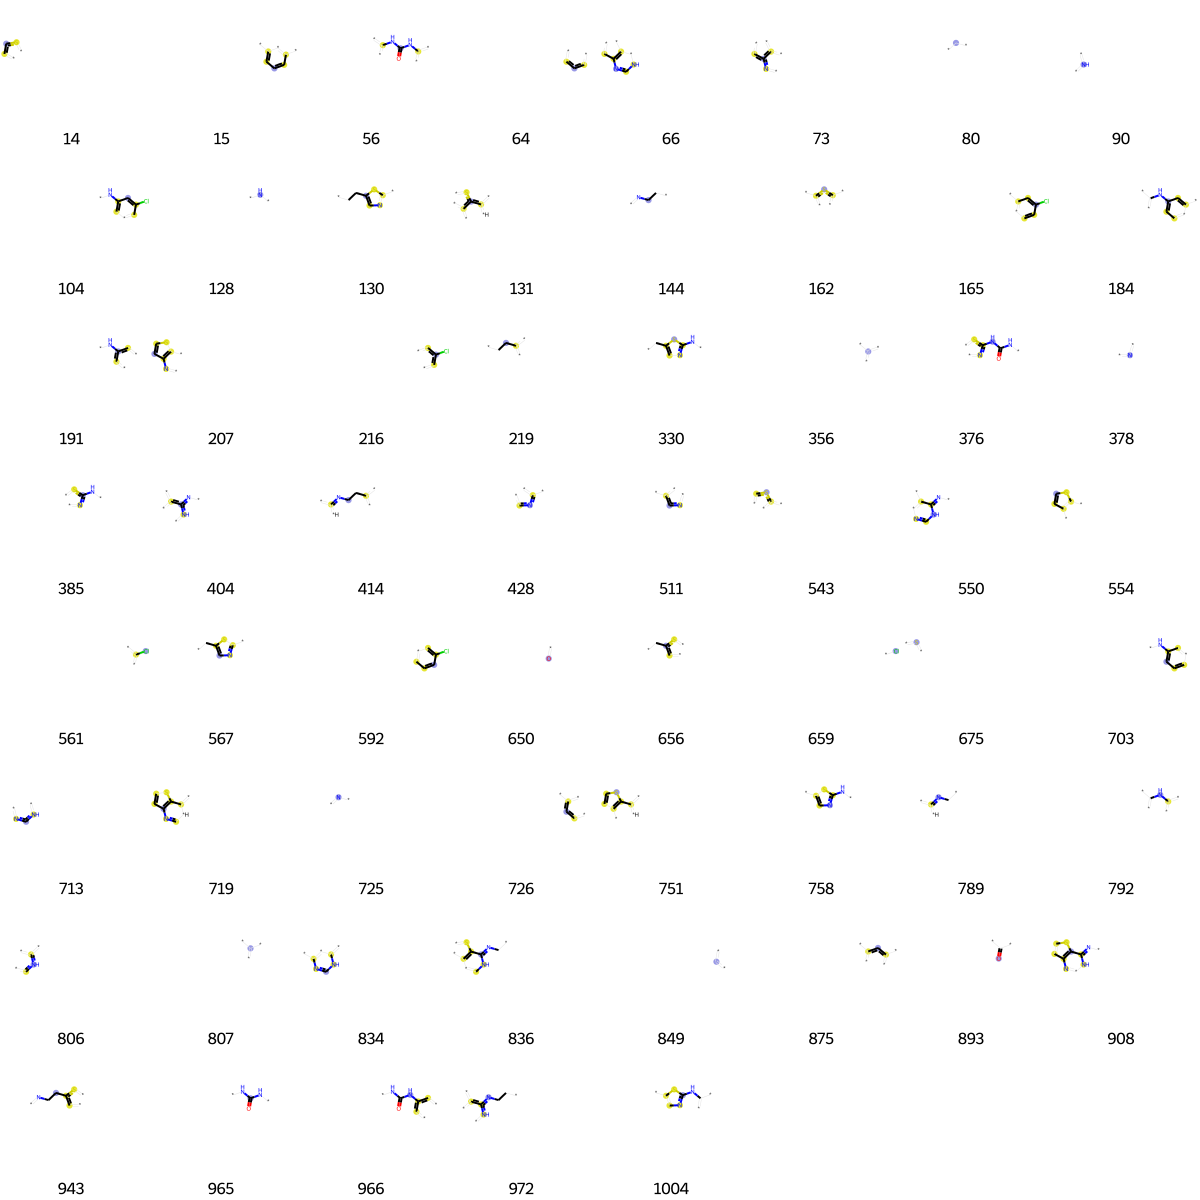

In [9664]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [9665]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[3,
 33,
 80,
 94,
 99,
 104,
 107,
 128,
 140,
 145,
 202,
 219,
 221,
 249,
 255,
 268,
 298,
 310,
 355,
 356,
 378,
 411,
 428,
 483,
 511,
 512,
 514,
 561,
 659,
 667,
 669,
 695,
 726,
 730,
 734,
 745,
 755,
 841,
 849,
 875,
 885,
 946,
 966,
 1004]

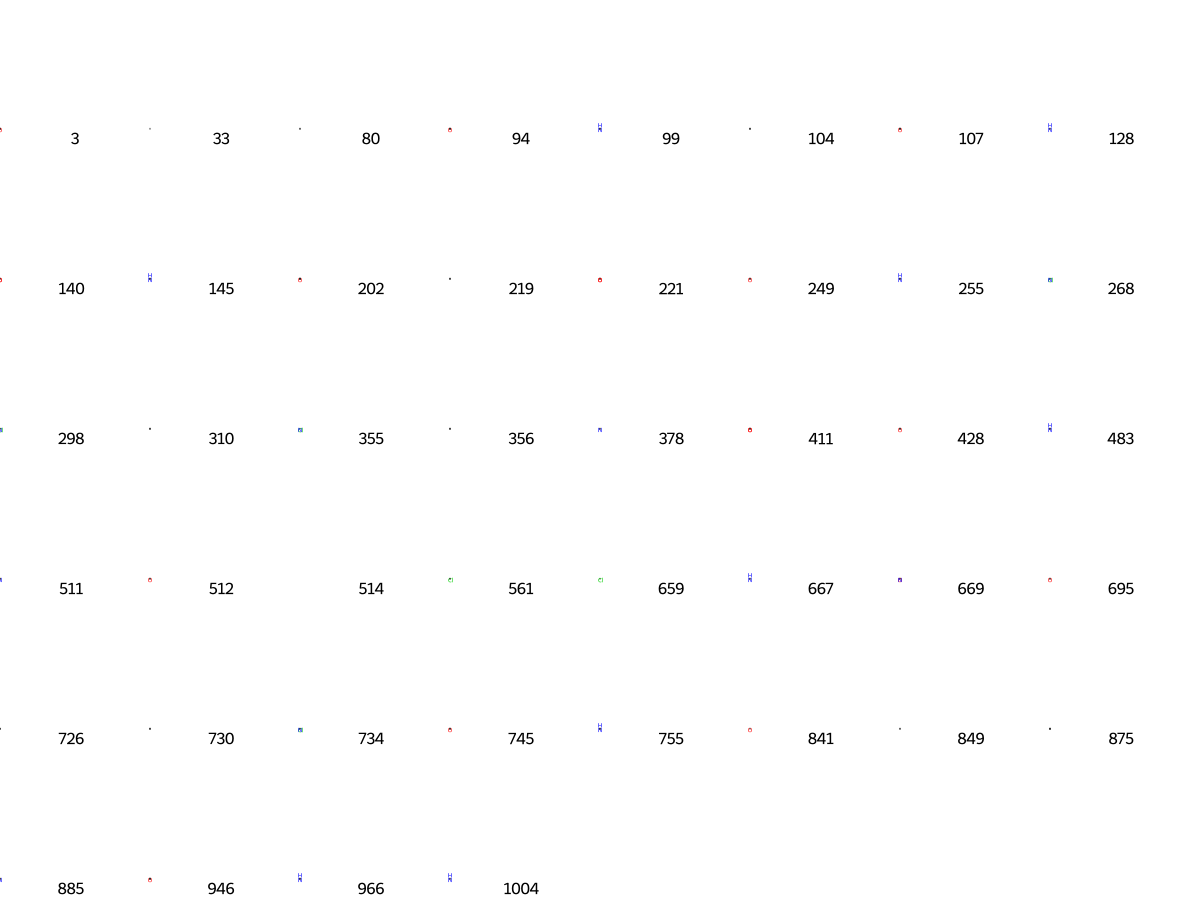

In [9666]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])